In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
cap = pd.read_csv('GSAF5.xls - Sheet1-GSAF.csv')
cap.head()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020.0,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020.0,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020.0,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020.0,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020.0,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN


In [48]:
cap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6462 entries, 0 to 6461
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             6460 non-null   object 
 1   Date                    6461 non-null   object 
 2   Year                    6459 non-null   float64
 3   Type                    6457 non-null   object 
 4   Country                 6411 non-null   object 
 5   Area                    5999 non-null   object 
 6   Location                5917 non-null   object 
 7   Activity                5910 non-null   object 
 8   Name                    6247 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3591 non-null   object 
 11  Injury                  6433 non-null   object 
 12  Fatal (Y/N)             5915 non-null   object 
 13  Time                    3070 non-null   object 
 14  Species                 3538 non-null   

In [49]:
cap.isna().sum()

Case Number                  2
Date                         1
Year                         3
Type                         5
Country                     51
Area                       463
Location                   545
Activity                   552
Name                       215
Unnamed: 9                6434
Age                       2871
Injury                      29
Fatal (Y/N)                547
Time                      3392
Species                   2924
Investigator or Source      19
pdf                       3396
href formula              3400
href                      3400
Case Number.1             3400
Case Number.2             3400
original order            3400
Unnamed: 22               6462
Unnamed: 23               6460
dtype: int64

In [50]:
cap = cap[cap['Year'] >= 1900]
cap['Year'] = cap['Year'].astype(int)
cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5721
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5718 non-null   object 
 1   Date                    5719 non-null   object 
 2   Year                    5719 non-null   int32  
 3   Type                    5716 non-null   object 
 4   Country                 5695 non-null   object 
 5   Area                    5399 non-null   object 
 6   Location                5339 non-null   object 
 7   Activity                5277 non-null   object 
 8   Name                    5548 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3498 non-null   object 
 11  Injury                  5700 non-null   object 
 12  Fatal (Y/N)             5249 non-null   object 
 13  Time                    2971 non-null   object 
 14  Species                 3354 non-null   

In [51]:
cap[(cap['Fatal (Y/N)'] != 'F') | (cap['Fatal (Y/N)'] != 'M') | (cap['Fatal (Y/N)'] != '2017')]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
0,2020.02.05,05-Feb-2020,2020,Unprovoked,USA,Maui,NaN,Stand-Up Paddle boarding,NaN,NaN,...,Tiger shark,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.01.30.R,Reported 30-Jan-2020,2020,Provoked,BAHAMAS,Exumas,NaN,Floating,Ana Bruna Avila,F,...,NaN,"K. McMurray, TrackingSharks.com",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020.01.17,17-Jan-2020,2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,...,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.17,2020.01.17,6502.0,NaN,NaN
3,2020.01.16,16-Jan-2020,2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,...,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.16,2020.01.16,6501.0,NaN,NaN
4,2020.01.13,13-Jan-2020,2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,...,NaN,"C. Creswell, GSAF",2020.01.13-Horne.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2020.01.13,2020.01.13,6500.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5717,1900.07.14,14-Jul-1900,1900,Invalid,USA,Hawaii,"Makapu'u Point, O'ahu",Hunting seashells,Emil Uhlbrecht & unidentified person,NaN,...,Questionable,"Los Angeles Times, 7/28/1900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5718,1900.07.00,Late Jul-1900,1900,Provoked,USA,Connecticut,"Bridgeport, Fairfield County",NaN,"skiff with Dr. William T. Healey, Dr. Henry Ca...",NaN,...,NaN,"Times, 8/1/1900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5719,1900.01.28,28-Jan-1900,1900,Unprovoked,AUSTRALIA,New South Wales,"Lane Cove River, Sydney Harbor (Estuary)","Standing, gathering oysters",Charles Duck,NaN,...,NaN,"Poverty Bay Herald, 2/12/1900",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5720,1900.00.00.b,Early 1900s,1900,Unprovoked,USA,Hawaii,"Inter-Island Dry Dock at Kakaako Street, Honol...",NaN,Emil A. Berndt,NaN,...,NaN,"G. H. Balazs; J. Borg, p.69; L. Taylor (1993),...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
cap[cap['Case Number'].isnull() == True]

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Unnamed: 9,...,Species,Investigator or Source,pdf,href formula,href,Case Number.1,Case Number.2,original order,Unnamed: 22,Unnamed: 23
5646,NaN,Reported 06-Sep-1905,1905,Provoked,USA,Florida,"Fort Pierce, St Lucie County",Fishing,David Curry,NaN,...,NaN,"Muncie Evening Press, 8/6/1913",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
cap[cap['Case Number'].isnull() == False]
cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5719 entries, 0 to 5721
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             5718 non-null   object 
 1   Date                    5719 non-null   object 
 2   Year                    5719 non-null   int32  
 3   Type                    5716 non-null   object 
 4   Country                 5695 non-null   object 
 5   Area                    5399 non-null   object 
 6   Location                5339 non-null   object 
 7   Activity                5277 non-null   object 
 8   Name                    5548 non-null   object 
 9   Unnamed: 9              28 non-null     object 
 10  Age                     3498 non-null   object 
 11  Injury                  5700 non-null   object 
 12  Fatal (Y/N)             5249 non-null   object 
 13  Time                    2971 non-null   object 
 14  Species                 3354 non-null   

In [54]:
cap['Case Number'].fillna('Null', inplace = True)
cap['Date'].fillna('Null', inplace = True)
cap['Year'].fillna('Null', inplace = True)
cap['Type'].fillna('Null', inplace = True)
cap['Country'].fillna('Null', inplace = True)
cap['Area'].fillna('Null', inplace = True)
cap['Location'].fillna('Null', inplace = True)
cap['Activity'].fillna('Null', inplace = True)
cap['Name'].fillna('Null', inplace = True)
cap['Unnamed: 9'].fillna('Null', inplace = True)
cap['Age'].fillna('Null', inplace = True)
cap['Injury'].fillna('Null', inplace = True)
cap['Fatal (Y/N)'].fillna('Null', inplace = True)
cap['Time'].fillna('Null', inplace = True)
cap['Investigator or Source'].fillna('Null', inplace = True)
cap['pdf'].fillna('Null', inplace = True)
cap['href'].fillna('Null', inplace = True)
cap['href formula'].fillna('Null', inplace = True)
cap['Case Number.1'].fillna('Null', inplace = True)
cap['Case Number.2'].fillna('Null', inplace = True)
cap['original order'].fillna('Null', inplace = True)
cap['Unnamed: 22'].fillna('Null', inplace = True)
cap['Unnamed: 23'].fillna('Null', inplace = True)

In [55]:
cap.drop(['Unnamed: 22', 'Unnamed: 23', 'Case Number.1', 'Case Number.2','href formula','href'], axis=1, inplace=True)

In [56]:
cap['Case Number'].fillna('Null', inplace = True)
cap['Date'].fillna('Null', inplace = True)
cap['Year'].fillna('Null', inplace = True)
cap['Type'].fillna('Null', inplace = True)
cap['Country'].fillna('Null', inplace = True)
cap['Area'].fillna('Null', inplace = True)
cap['Location'].fillna('Null', inplace = True)
cap['Activity'].fillna('Null', inplace = True)
cap['Name'].fillna('Null', inplace = True)
cap['Unnamed: 9'].fillna('Null', inplace = True)
cap['Age'].fillna('Null', inplace = True)
cap['Injury'].fillna('Null', inplace = True)
cap['Fatal (Y/N)'].fillna('Null', inplace = True)
cap['Time'].fillna('Null', inplace = True)
cap['Investigator or Source'].fillna('Null', inplace = True)
cap['pdf'].fillna('Null', inplace = True)
cap['original order'].fillna('Null', inplace = True)
cap['Species '].fillna('Null', inplace = True)

In [57]:
cap.isna().sum()

Case Number               0
Date                      0
Year                      0
Type                      0
Country                   0
Area                      0
Location                  0
Activity                  0
Name                      0
Unnamed: 9                0
Age                       0
Injury                    0
Fatal (Y/N)               0
Time                      0
Species                   0
Investigator or Source    0
pdf                       0
original order            0
dtype: int64

In [58]:
cap.rename(columns = {'Unnamed: 9': 'Gender'}, inplace=True)
# replacing the unnamed column with gender

In [59]:
cap.head(100)

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
0,2020.02.05,05-Feb-2020,2020,Unprovoked,USA,Maui,Null,Stand-Up Paddle boarding,Null,Null,Null,"No injury, but paddleboard bitten",N,09h40,Tiger shark,"K. McMurray, TrackingSharks.com",Null,Null
1,2020.01.30.R,Reported 30-Jan-2020,2020,Provoked,BAHAMAS,Exumas,Null,Floating,Ana Bruna Avila,F,24,PROVOKED INCIDENT Scratches to left wrist,N,Null,Null,"K. McMurray, TrackingSharks.com",Null,Null
2,2020.01.17,17-Jan-2020,2020,Unprovoked,AUSTRALIA,New South Wales,Windang Beach,Surfing,Will Schroeter,M,59,Laceration ot left ankle and foot,N,08h00,"""A small shark""","B. Myatt & M. Michaelson, GSAF; K. McMurray, T...",2020.01.17-Schroeter.pdf,6502.0
3,2020.01.16,16-Jan-2020,2020,Unprovoked,NEW ZEALAND,Southland,Oreti Beach,Surfing,Jordan King,F,13,Minor injury to lower leg,N,20h30,Broadnose seven gill shark?,"K. McMurray, TrackingSharks.com",2020.01.16-King.pdf,6501.0
4,2020.01.13,13-Jan-2020,2020,Unprovoked,USA,North Carolina,"Rodanthe, Dare County",Surfing,Samuel Horne,M,26,Lacerations to foot,N,14h33,Null,"C. Creswell, GSAF",2020.01.13-Horne.pdf,6500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019.03.22,22-Mar-2019,2019,Unprovoked,USA,Florida,"Hobe Sound, Martin County",Surfing,Chris Bryan,Null,46,Lacerations to foot,N,16h00,4' shark,"M. Michaelson, GSAF",Null,Null
96,2019.03.21,21-Mar-2019,2019,Unprovoked,MEXICO,Guerrero,Troncones,Swimming,Alex Wilton,Null,32,20 cm gash to right leg,N,17h30,Null,"K.McMurray, TrackingSharks.com",Null,Null
97,2019.03.16,Reported 16-Mar-2019,2019,Unprovoked,USA,Hawaii,Kaiwi Channel,Swimming,Eric Schall,Null,58,Bite to abdomen,N,Null,Cookiecutter shark,"Honolulu Star Advertiser, 3/16/2019",Null,Null
98,2019.03.12,12-Mar-2019,2019,Unprovoked,USA,Florida,"Stuart Beach, Martin County",Boogie boarding,Kael Dewey,Null,11,Lacerations to right foot,N,14h00,Spinner shark,"K. McMurray, TrackingSharks.com",Null,Null


In [60]:
cap.tail()

,Case Number,Date,Year,Type,Country,Area,Location,Activity,Name,Gender,Age,Injury,Fatal (Y/N),Time,Species,Investigator or Source,pdf,original order
5717,1900.07.14,14-Jul-1900,1900,Invalid,USA,Hawaii,"Makapu'u Point, O'ahu",Hunting seashells,Emil Uhlbrecht & unidentified person,Null,Null,"Believed drowned. Uhlbrecht’s foot, and the pe...",Null,Null,Questionable,"Los Angeles Times, 7/28/1900",Null,Null
5718,1900.07.00,Late Jul-1900,1900,Provoked,USA,Connecticut,"Bridgeport, Fairfield County",Null,"skiff with Dr. William T. Healey, Dr. Henry Ca...",Null,Null,"No injury to occupants. They shot shark, then ...",N,Null,Null,"Times, 8/1/1900",Null,Null
5719,1900.01.28,28-Jan-1900,1900,Unprovoked,AUSTRALIA,New South Wales,"Lane Cove River, Sydney Harbor (Estuary)","Standing, gathering oysters",Charles Duck,Null,Null,Right posterior thigh bitten,N,12h00,Null,"Poverty Bay Herald, 2/12/1900",Null,Null
5720,1900.00.00.b,Early 1900s,1900,Unprovoked,USA,Hawaii,"Inter-Island Dry Dock at Kakaako Street, Honol...",Null,Emil A. Berndt,Null,Null,Severe abrasion when shark swam between his legs,N,Null,Null,"G. H. Balazs; J. Borg, p.69; L. Taylor (1993),...",Null,Null
5721,1900.00.00.a,Ca. 1900,1900,Unprovoked,SOUTH AFRICA,Eastern Cape Province,Port Elizabeth,Swimming,Mr. Gruner,Null,Null,Leg severed,N,Early morning,Null,H. Monsen,Null,Null


In [61]:
import warnings
warnings.filterwarnings('ignore')

In [62]:
cap['Country'].value_counts()

USA                               2162
AUSTRALIA                         1216
SOUTH AFRICA                       555
PAPUA NEW GUINEA                   131
BRAZIL                             109
                                  ... 
FEDERATED STATES OF MICRONESIA       1
ADMIRALTY ISLANDS                    1
BRITISH WEST INDIES                  1
RED SEA / INDIAN OCEAN               1
CYPRUS                               1
Name: Country, Length: 173, dtype: int64

Text(0.5, 1.0, 'Top 10 Countries with the most shark attacks')

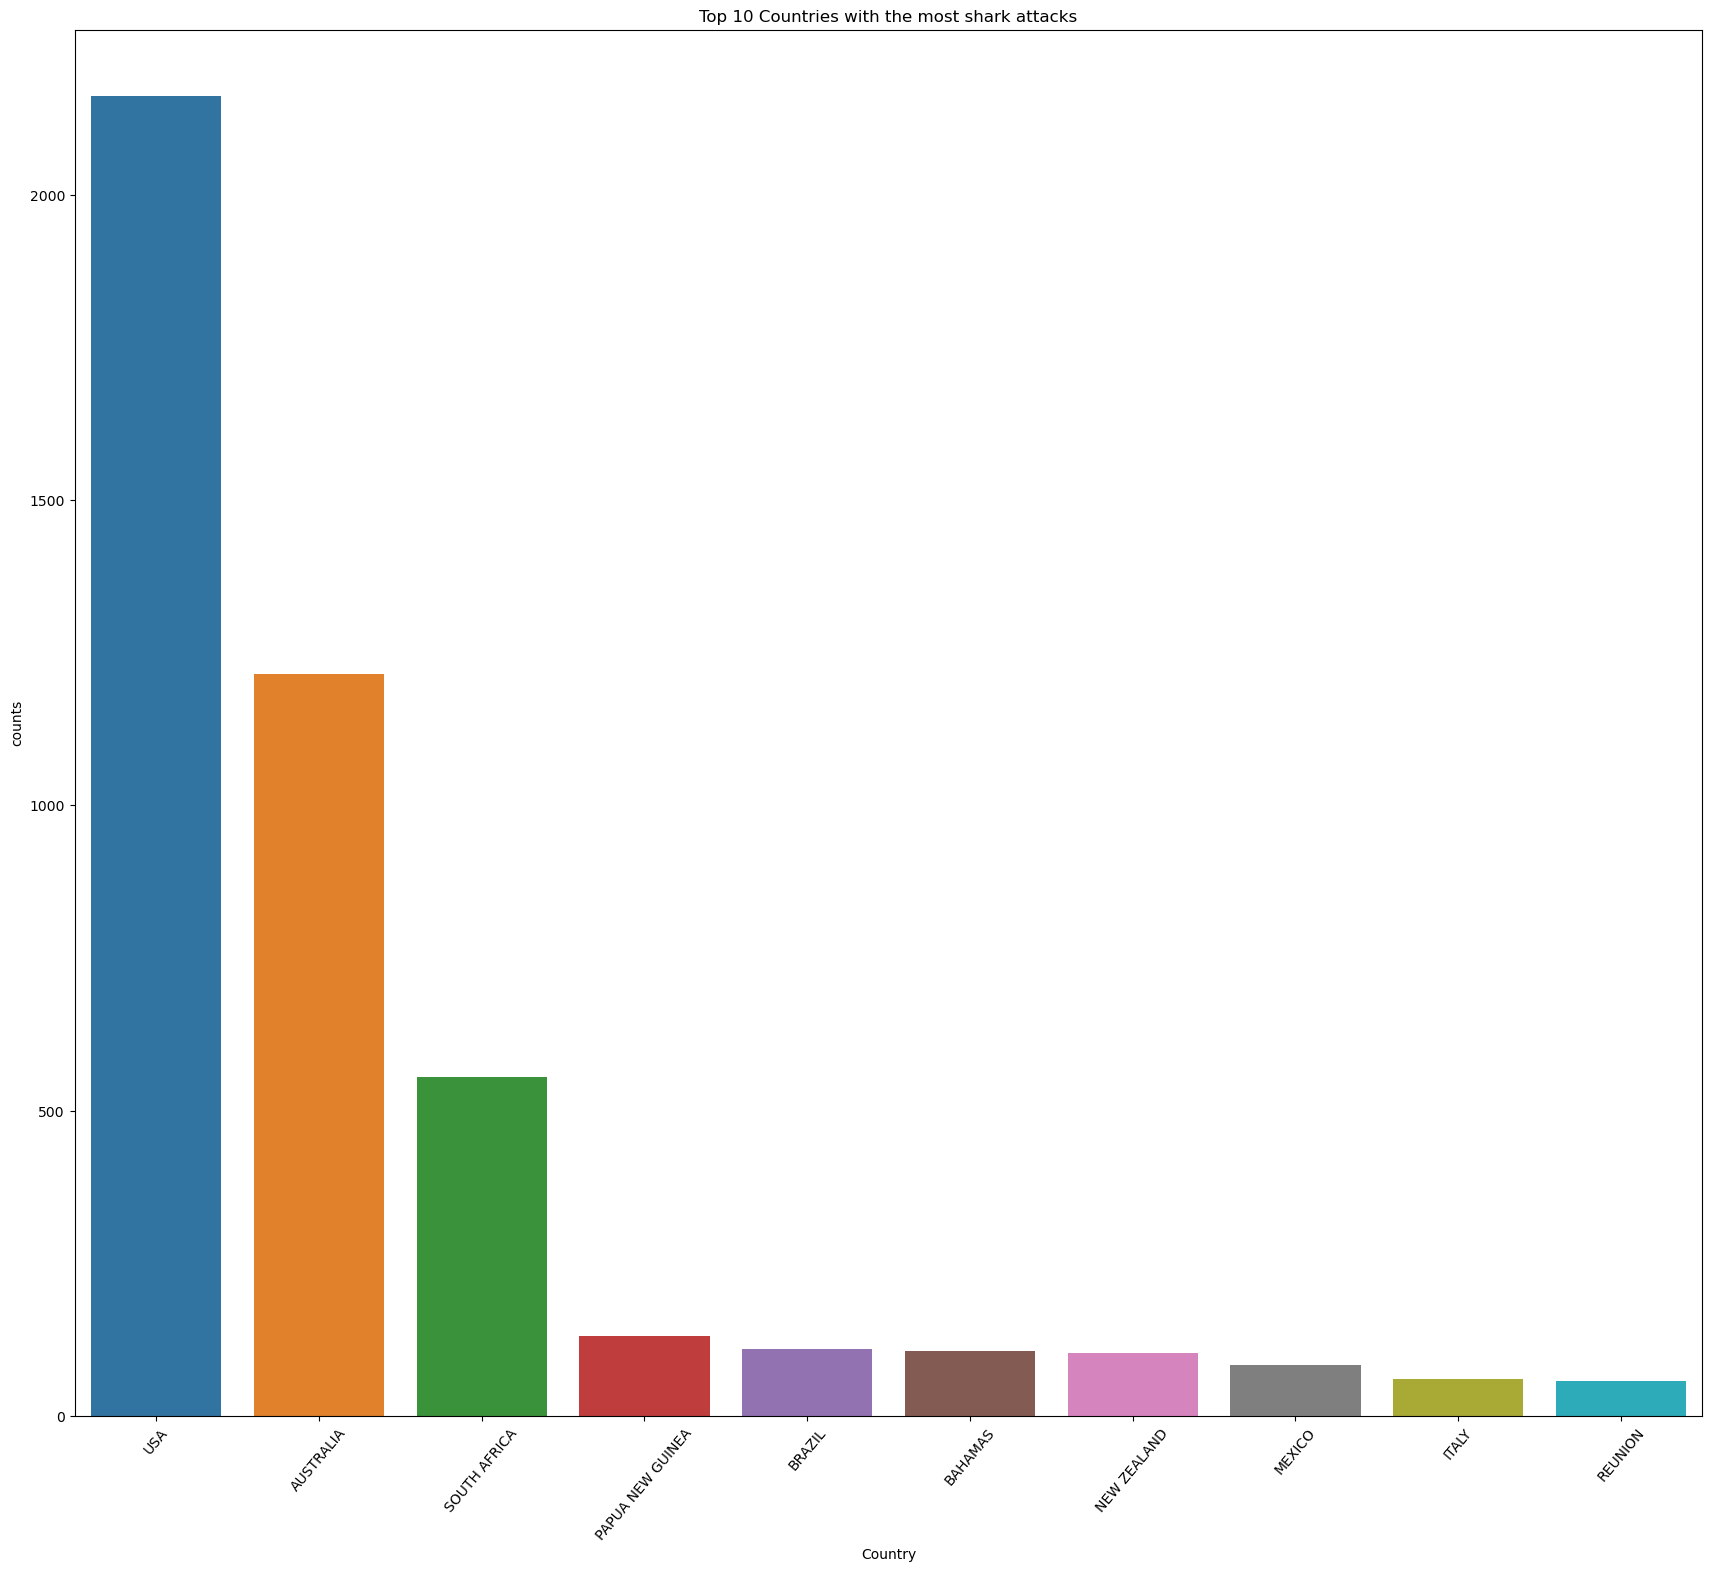

In [63]:
captop_countries = cap.set_index('Area')['Country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(21,18))
sns.countplot(captop_countries, order=captop_countries.value_counts().index[:10])
plt.xlabel('Country')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 10 Countries with the most shark attacks')

1. The plot displays a bar chart representing the frequency of shark attacks in different countries.

2. The x-axis of the plot represents the countries, while the y-axis represents the counts of shark attacks.

3. The countries are ordered based on their occurrence counts, with the highest count being on the left side of the chart.

4. The top 10 countries with the most shark attacks are included in the plot, as indicated by the `order` parameter set to `captop_countries.value_counts().index[:10]` in the `sns.countplot()` function.

5. The plot is generated with a large size of 21x18 inches, which allows for a detailed view of the data.

6. The x-axis labels are rotated by 50 degrees using the `plt.tick_params()` function, which improves readability when there are many countries to display.

7. The x-axis is labeled as 'Country', indicating that each bar represents a specific country.

8. The y-axis is labeled as 'counts', indicating the number of shark attacks for each country.

9. The plot is titled 'Top 10 Countries with the most shark attacks', providing a clear context for the visualization.

Overall, the plot allows for a quick visual comparison of the top 10 countries with the highest number of shark attacks, helping us to see that USA has had the most shark attacks followed by Australia.. 

In [64]:
cap['Activity'].value_counts()

Surfing                               1022
Swimming                               813
Null                                   442
Fishing                                406
Spearfishing                           345
                                      ... 
Commercial spearfishing                  1
Exercising his dog in the shallows       1
Free diving Spearfishing                 1
Standing / Wading                        1
Standing, gathering oysters              1
Name: Activity, Length: 1311, dtype: int64

In [65]:
cap = cap[cap['Activity'] != 'Null']

Text(0.5, 1.0, 'Top 10 activities of the invidivuals when the sharks attacked')

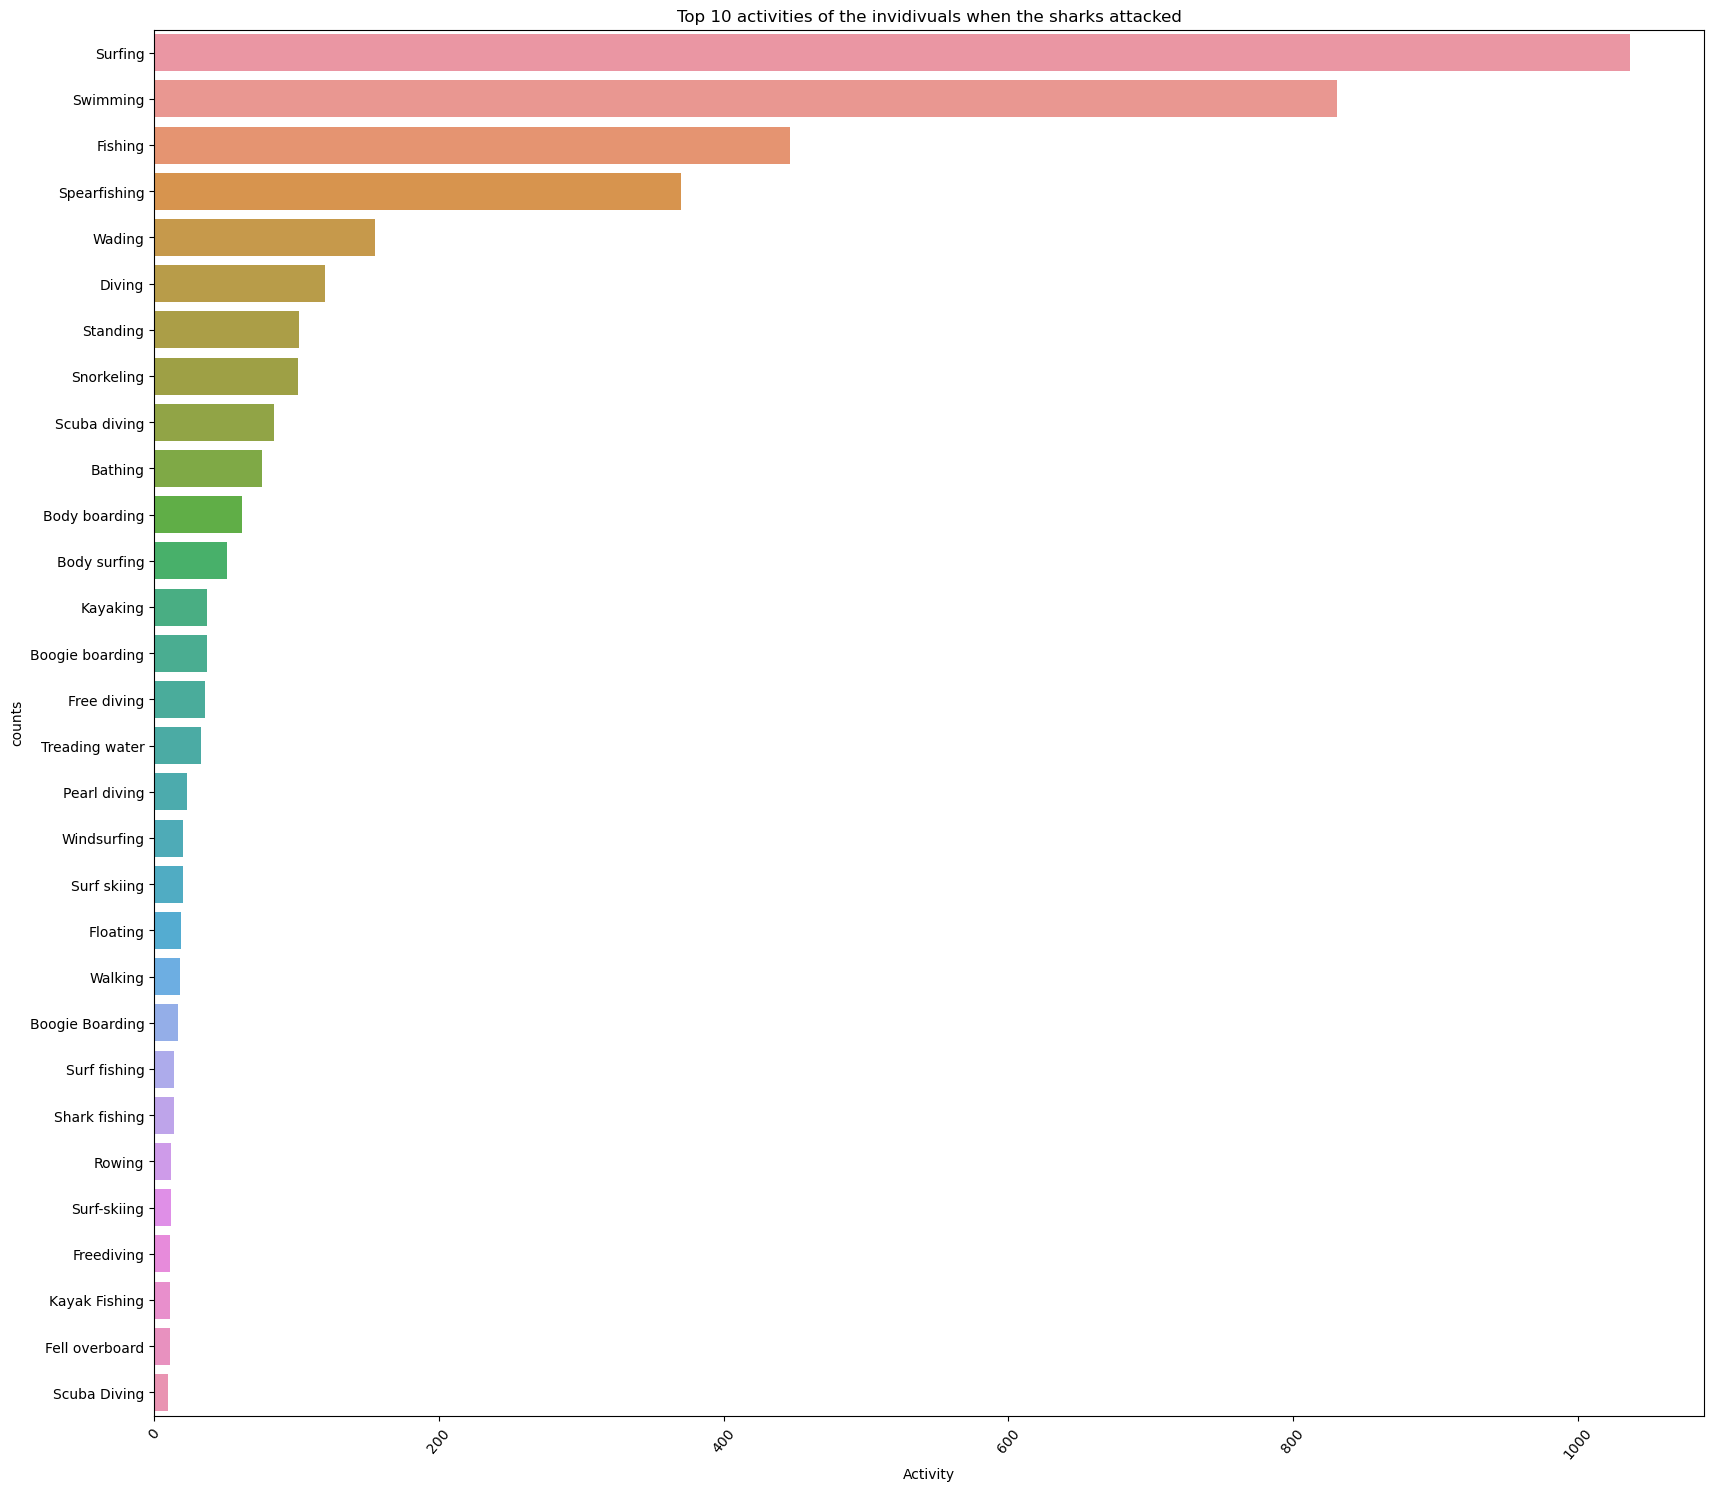

In [66]:
cap_activity = cap.set_index('Area')['Activity'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(y= cap_activity, order=cap_activity.value_counts().index[:30])
plt.xlabel('Activity')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 10 activities of the invidivuals when the sharks attacked')

1. The plot represents a horizontal bar chart that visualizes the frequency of different activities individuals were engaged in when shark attacks occurred.

2. The y-axis of the plot represents the activities, while the x-axis represents the counts of shark attacks associated with each activity.

3. The activities are ordered based on their occurrence counts, with the activities having the highest count displayed at the top of the chart.

4. The plot includes the top 30 activities with the most occurrences, as indicated by the `order` parameter set to `cap_activity.value_counts().index[:30]` in the `sns.countplot()` function.

5. The plot is generated with a large size of 20x18 inches, allowing for a detailed view of the data.

6. The y-axis labels, representing the activities, are not rotated, as indicated by the absence of the `labelrotation` parameter in the `plt.tick_params()` function.

7. The x-axis is labeled as 'counts', indicating the number of shark attacks associated with each activity.

8. The y-axis does not have a specific label mentioned in the code, but it represents the different activities individuals were engaged in when shark attacks occurred.

9. The plot is titled 'Top 10 activities of the individuals when the sharks attacked', providing a clear context for the visualization. However, it's worth noting that the title mentions the 'Top 10' activities, while the `order` parameter in the code selects the top 30 activities.

10. The plot allows for a quick visual comparison of the frequency of different activities during shark attacks, helping to identify the most common activities associated with such incidents.

11. The horizontal orientation of the bar chart allows for a better display of the activity labels, especially when there are many activities to show.

12. By examining the heights of the bars, one can identify the activities that have the highest occurrence of shark attacks, potentially providing insights into the risk factors associated with certain activities.

In summary, the plot provides an overview of the top activities individuals were engaged in when shark attacks occurred, allowing for an assessment of the most prevalent activities during such incidents. Most of them where surfing whene they where attacked.

In [67]:
cap['Species '].value_counts()

Null                                                      2115
White shark                                                155
Invalid                                                     80
Shark involvement not confirmed                             76
Tiger shark                                                 75
                                                          ... 
Sandtiger shark, 3 m [10']                                   1
1.2 m [4'] blacktip or sandbar shark                         1
Mako shark, 400-lb                                           1
1.2 m to 1.5 m [4' to 5'] shark, possibly a bull shark       1
Tiger shark, 3.9 m                                           1
Name: Species , Length: 1384, dtype: int64

In [68]:
cap = cap[cap['Species '] != 'Null']

Text(0.5, 1.0, 'Top 30 species')

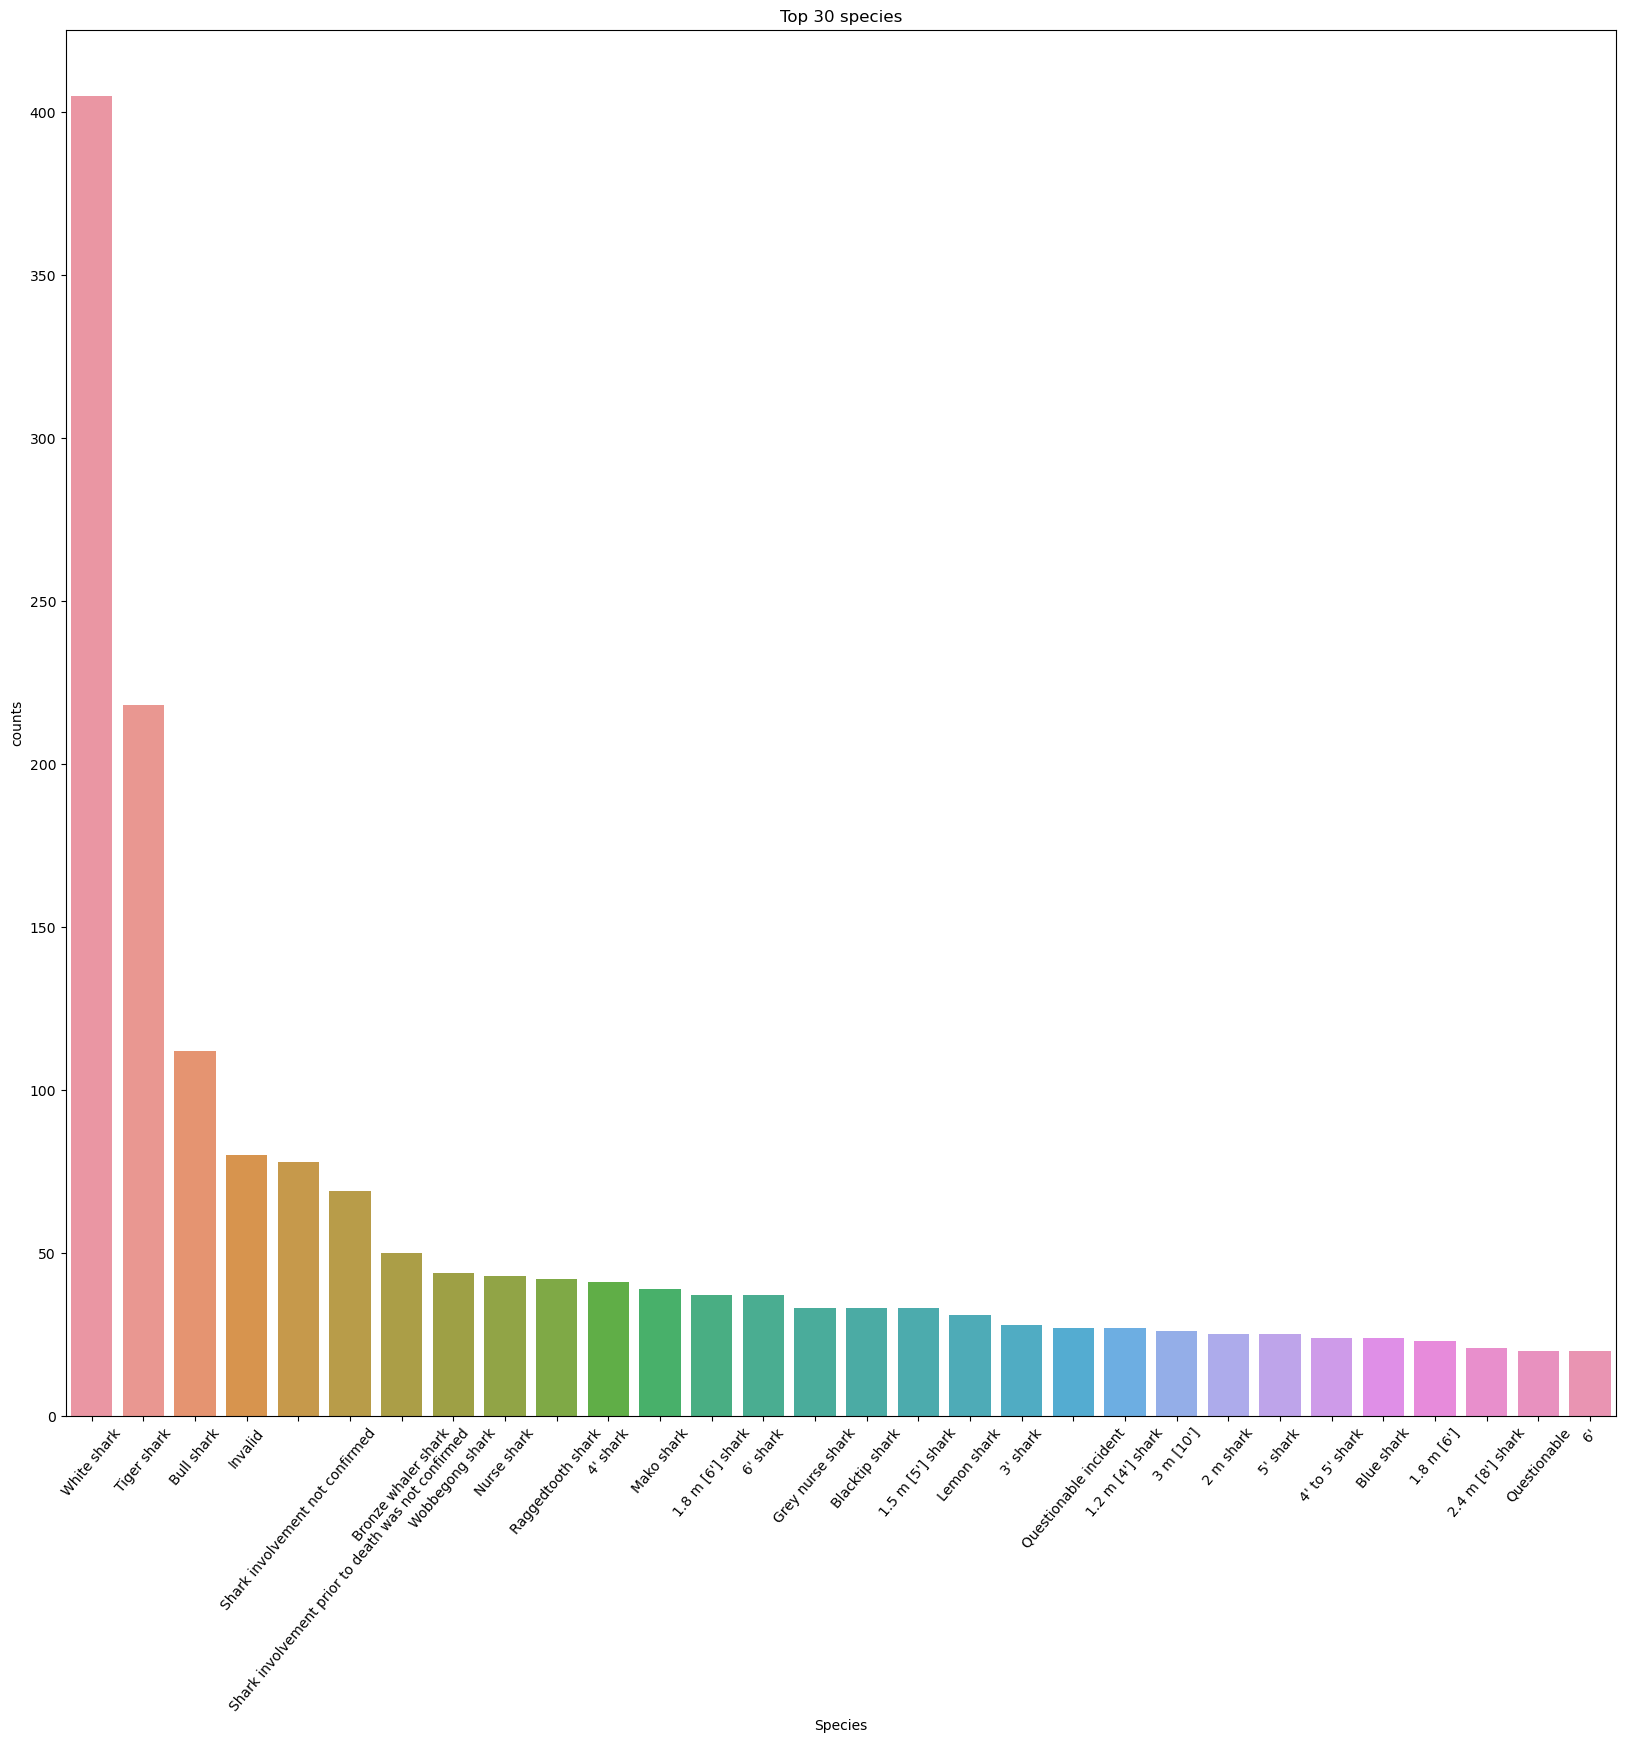

In [69]:
cap_species = cap.set_index('Type')['Species '].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(cap_species, order=cap_species.value_counts().index[:30])
plt.xlabel('Species')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 30 species')

The plot represents a bar chart that visualizes the frequency of different species of sharks involved in shark attack incidents.


1. The x-axis of the plot represents the species of sharks, while the y-axis represents the counts of each species.
2. The species of sharks are ordered based on their occurrence counts, with the most frequent species displayed on the left side of the chart.
3. The plot includes the top 30 species with the highest occurrence, as indicated by the `order` parameter set to `cap_species.value_counts().index[:30]` in the `sns.countplot()` function.
4. The plot is generated with a large size of 20x18 inches, allowing for a detailed view of the data.
5. The x-axis labels representing the species of sharks are rotated by 50 degrees using the `plt.tick_params()` function, which improves readability when there are many species to display.
6. The y-axis is labeled as 'counts', indicating the number of occurrences for each species of shark involved in shark attack incidents.
7. The x-axis is labeled as 'Species', indicating that each bar represents a specific species of shark.
8. The plot is titled 'Top 30 species', providing a clear context for the visualization.
9. The plot allows for a quick visual comparison of the frequency of different species of sharks involved in shark attacks, helping to identify the most common species.
10. By examining the heights of the bars, one can identify the species of sharks that are most frequently involved in shark attacks, providing insights into the potential risks associated with specific shark species.
11. The bar chart provides an effective means of comparing the occurrence of different shark species, enabling researchers, policymakers, and the public to understand the prevalence and impact of various shark species in relation to shark attacks.
12. The plot and its results contribute to a better understanding of the distribution and prevalence of different shark species involved in shark attack incidents, aiding in efforts to mitigate and manage human-shark interactions.

In conclusion, the plot and its result provide valuable information on the top 30 species of sharks involved in shark attacks, shedding light on the relative occurrence and significance of different shark species in these incidents. Meanwhile the sharks wiht the most attacks remians unknown but safety measures can be put in place for people against the white shark which seem to have the most attack

In [70]:
cap['Year'].value_counts()

2015    103
2007     84
2014     80
2008     78
2012     77
       ... 
1917      1
3019      1
1904      1
1903      1
1902      1
Name: Year, Length: 122, dtype: int64

In [71]:
cap = cap[cap['Year'] >= 1900]
cap['Year'] = cap['Year'].astype(int)
cap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3162 entries, 0 to 5717
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case Number             3162 non-null   object
 1   Date                    3162 non-null   object
 2   Year                    3162 non-null   int32 
 3   Type                    3162 non-null   object
 4   Country                 3162 non-null   object
 5   Area                    3162 non-null   object
 6   Location                3162 non-null   object
 7   Activity                3162 non-null   object
 8   Name                    3162 non-null   object
 9   Gender                  3162 non-null   object
 10  Age                     3162 non-null   object
 11  Injury                  3162 non-null   object
 12  Fatal (Y/N)             3162 non-null   object
 13  Time                    3162 non-null   object
 14  Species                 3162 non-null   object
 15  Inve

Text(0.5, 1.0, 'Top 20 Years of injury sustained')

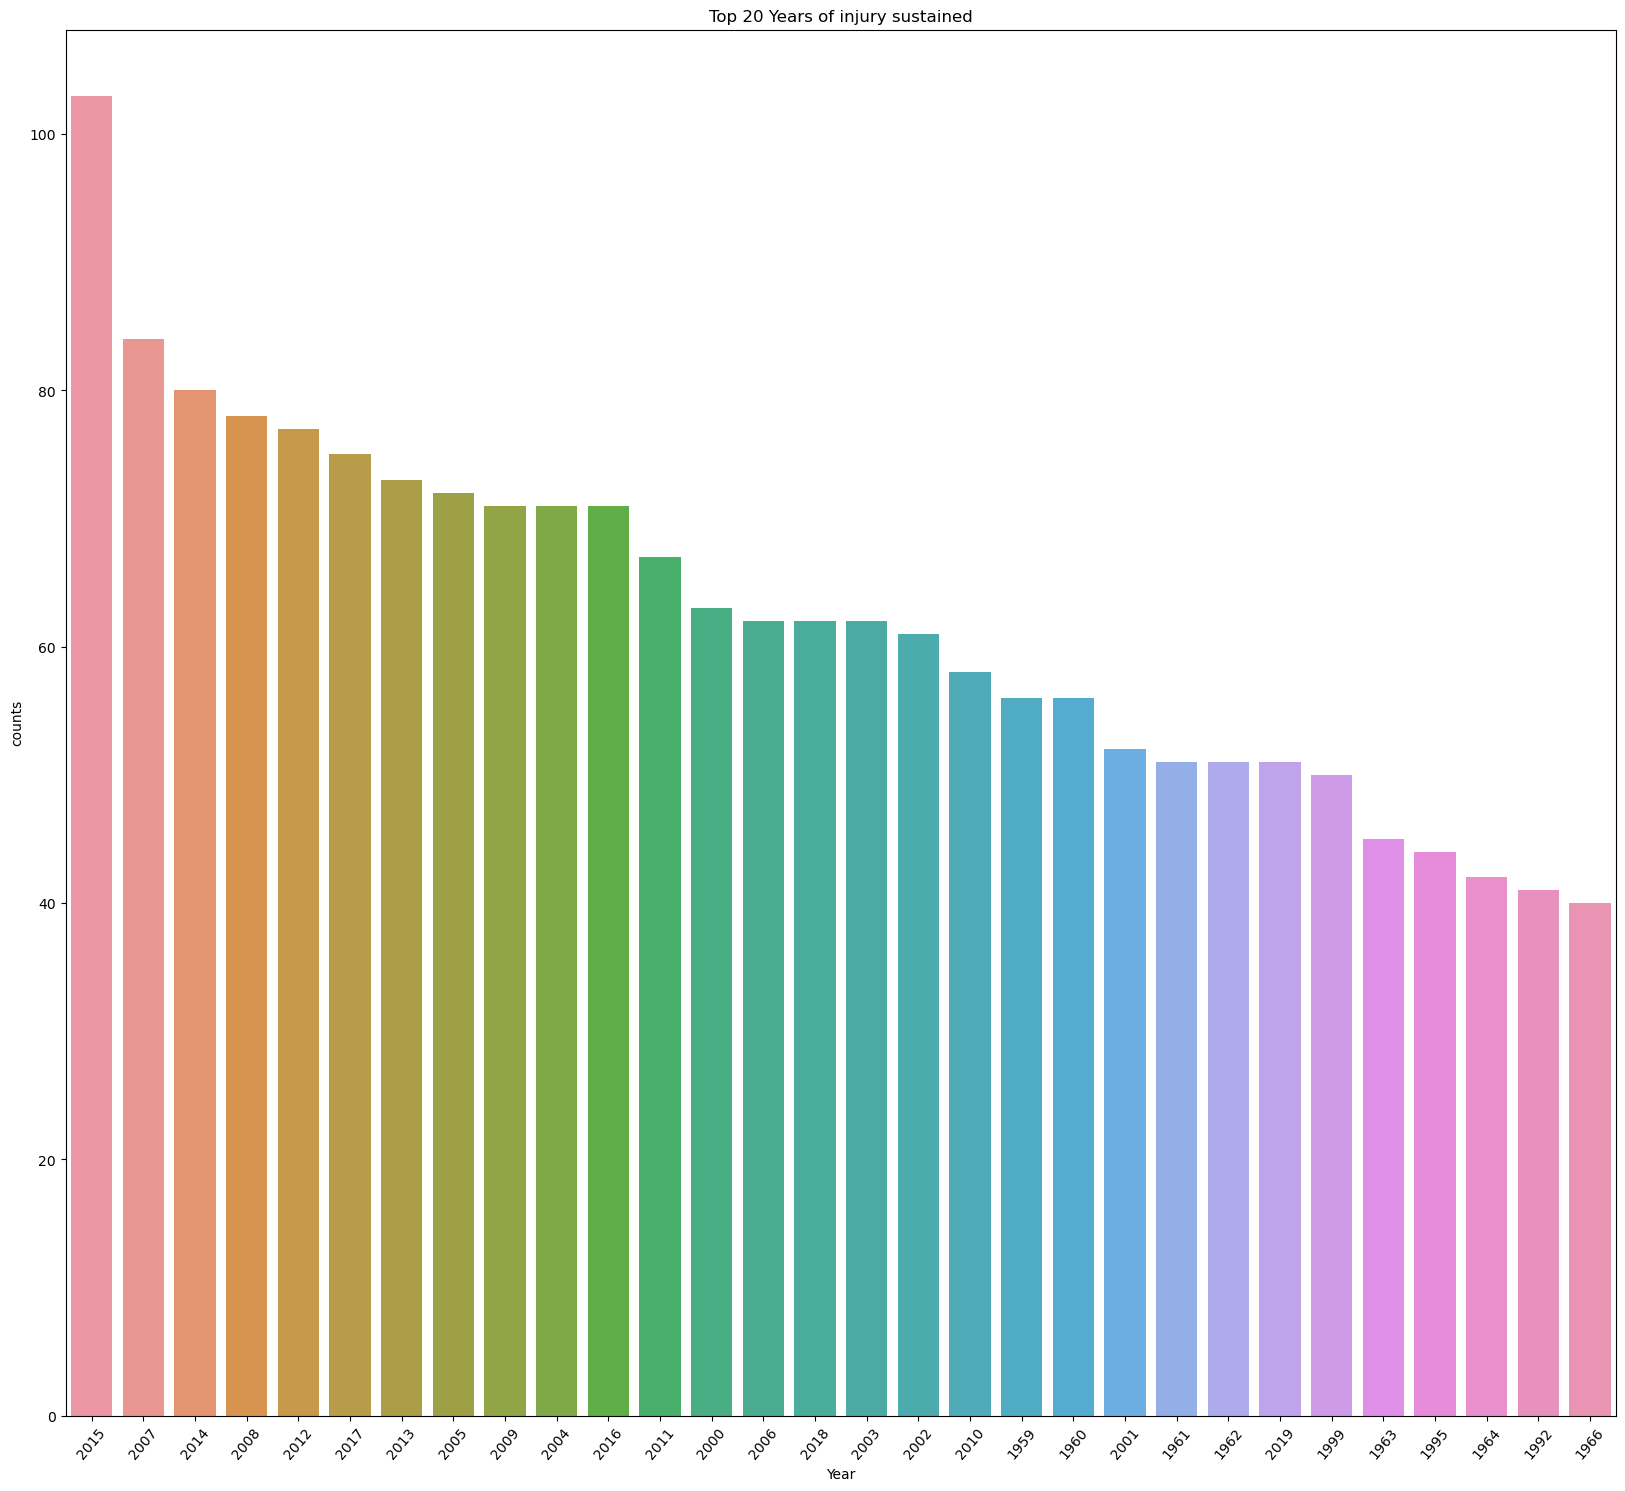

In [72]:
cap_year = cap.set_index('Type')['Year'].astype(str).str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(cap_year, order=cap_year.value_counts().index[:30])
plt.xlabel('Year')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 20 Years of injury sustained')

Observation:
The plot represents a bar chart that visualizes the frequency of shark attacks based on the dates when the injuries were sustained.

Explanation:
1. The x-axis of the plot represents the dates when the injuries were sustained, while the y-axis represents the counts of shark attacks.
2. The dates are ordered based on their occurrence counts, with the most frequent dates displayed on the left side of the chart.
3. The plot includes the top 30 dates with the highest occurrence of injuries, as indicated by the `order` parameter set to `cap_year.value_counts().index[:30]` in the `sns.countplot()` function.
4. The plot is generated with a large size of 20x18 inches, allowing for a detailed view of the data.
5. The x-axis labels representing the dates are rotated by 50 degrees using the `plt.tick_params()` function, which improves readability when there are many dates to display.
6. The y-axis is labeled as 'counts', indicating the number of shark attacks that occurred on each specific date.
7. The x-axis is labeled as 'Year', suggesting that each bar represents a specific year when the injuries were sustained.
8. The plot is titled 'Top 30 Dates of injury sustained', providing a clear context for the visualization.
9. The plot allows for a quick visual comparison of the frequency of shark attacks across different dates, helping to identify patterns or specific dates with higher incidences.
10. By examining the heights of the bars, one can identify the dates when shark attacks were most prevalent, which may provide insights into factors such as seasonal variations, human activities, or shark migration patterns.
11. The bar chart offers a convenient way to compare the occurrence of shark attacks across different dates, allowing researchers and policymakers to identify temporal trends and potentially take preventive measures during high-risk periods.
12. The plot and its result contribute to a better understanding of the temporal distribution and frequency of shark attacks, aiding in the development of strategies to mitigate and manage human-shark interactions.

In conclusion, the plot and its result provide valuable information on the top 30 dates when injuries were sustained due to shark attacks, enabling a closer examination of temporal patterns and aiding in the identification of high-risk periods.**WOW! 103 attacks where recorded in year 2015**

In [73]:
cap['Area'].value_counts()

Florida                537
New South Wales        267
California             233
Hawaii                 194
Queensland             153
                      ... 
Caroline Islands         1
North Pacific coast      1
Nueva Esparta            1
Johnston Atoll           1
Syracuse                 1
Name: Area, Length: 417, dtype: int64

Text(0.5, 1.0, 'Top 30 waters with the highest shark attacks')

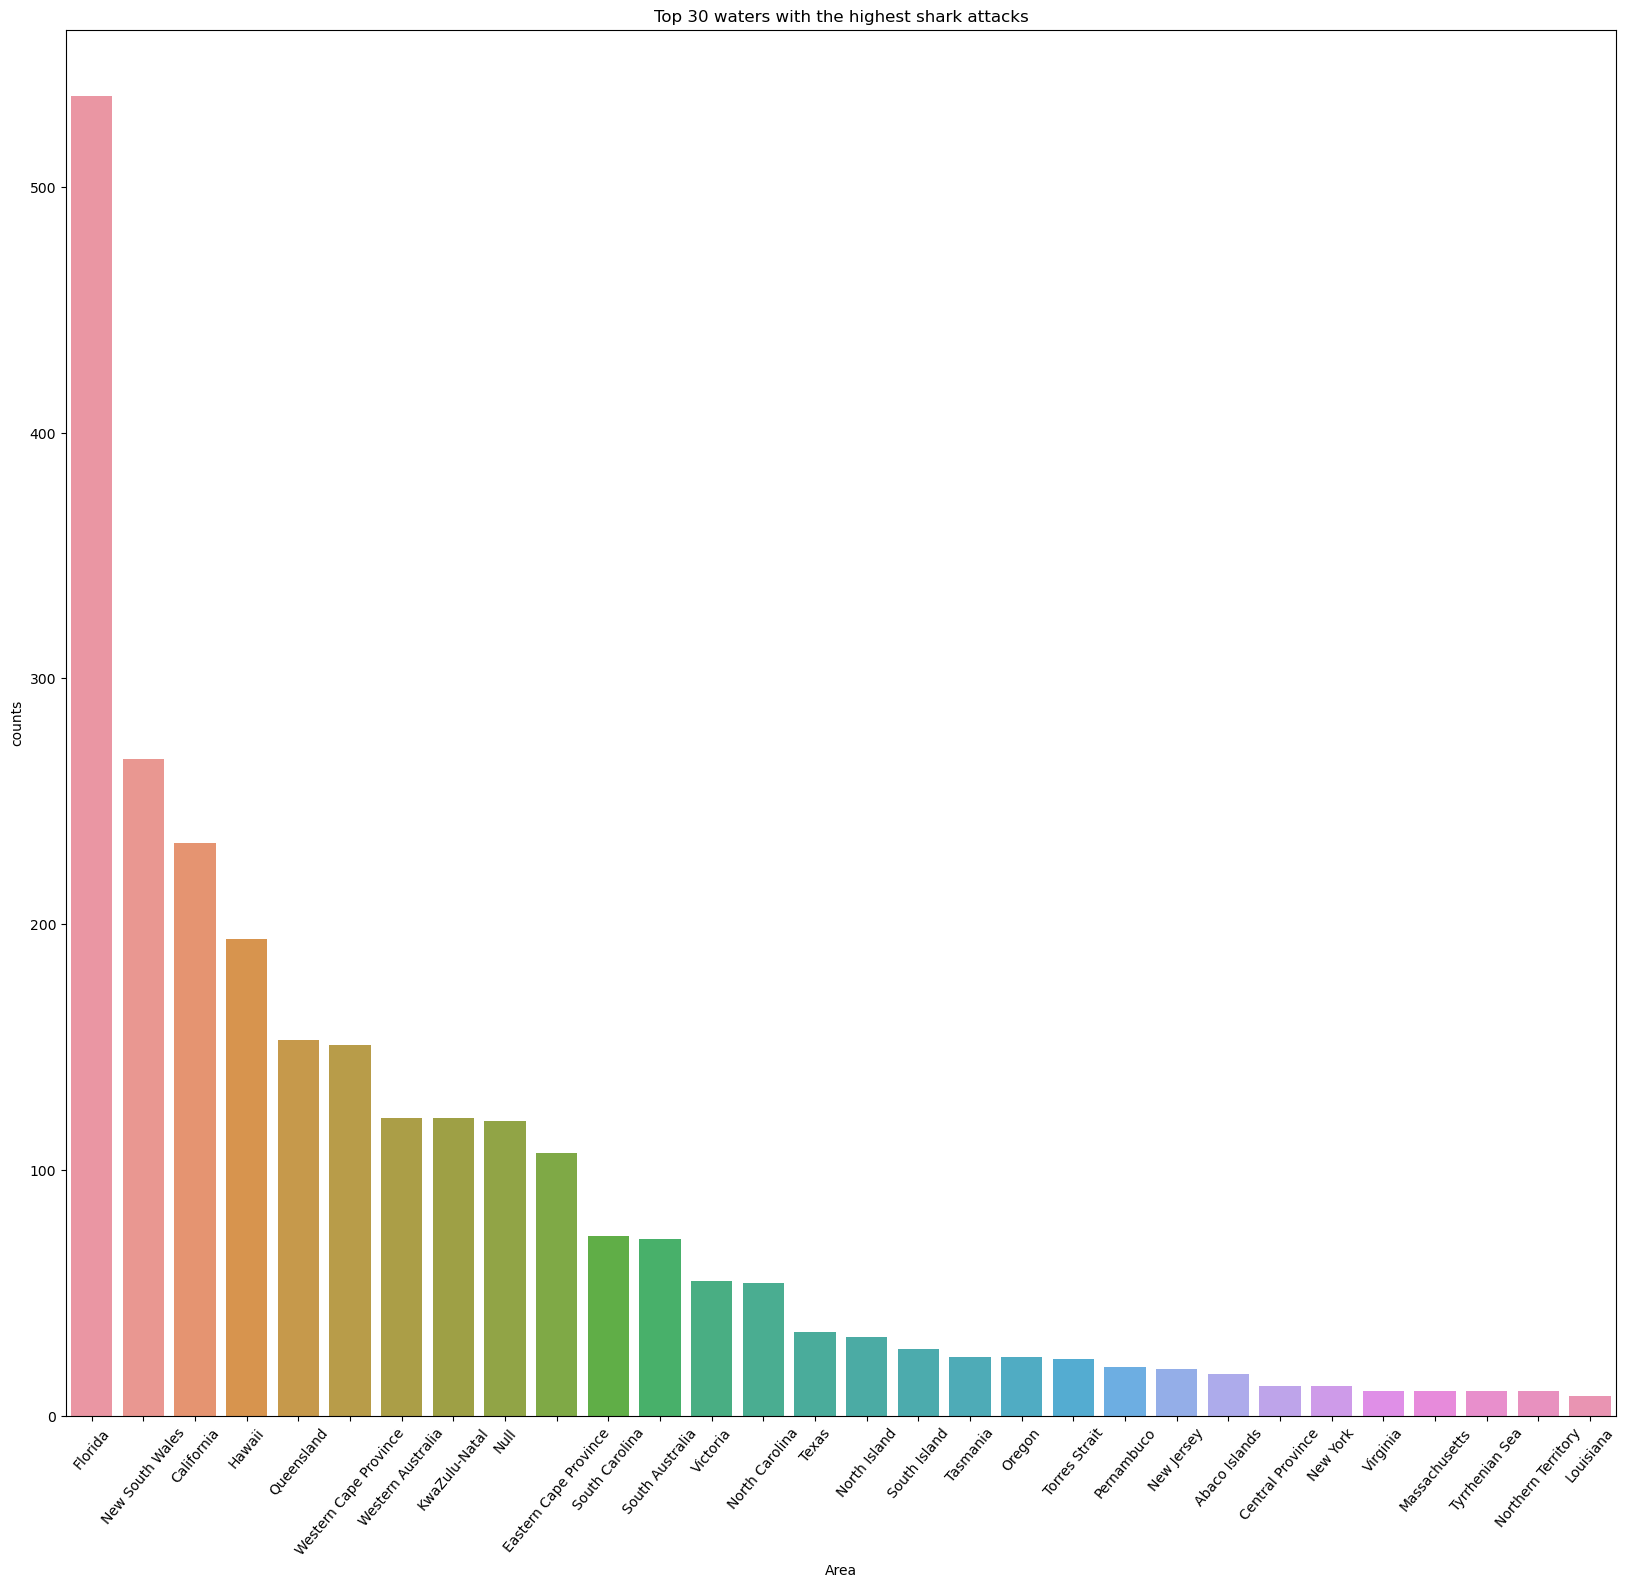

In [74]:
cap_area = cap.set_index('Type')['Area'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(cap_area, order=cap_area.value_counts().index[:30])
plt.xlabel('Area')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 30 waters with the highest shark attacks')

Explanation:
The provided code generates a countplot to visualize the distribution of shark attack incidents across different areas (waters). Here's a step-by-step explanation:

1. The code begins by setting the index of the DataFrame `cap` to the 'Type' column using `cap.set_index('Type')`. This allows us to access the 'Area' column efficiently.
2. The `str.split(', ', expand=True)` method is then applied to the 'Area' column, splitting the values by the delimiter ', '. This creates a DataFrame with the split values, with each value representing a specific area where shark attacks occurred.
3. The `stack()` method is used to stack the split values vertically, resulting in a Series with a multi-level index. This operation combines all the area values into a single Series.
4. The `reset_index(level=1, drop=True)` method is employed to reset the index, removing the redundant level and making the Series a single-level index.
5. The resulting Series, `cap_area`, contains the split 'Area' values from the original DataFrame `cap`.
6. The code then creates a countplot using `sns.countplot()`, which visualizes the frequency of each unique area.
7. The `cap_area` Series is passed as the data parameter to `sns.countplot()`.
8. The `order` parameter is set to `cap_area.value_counts().index[:30]`, which orders the bars based on the counts of each area value and limits it to the top 30 values.
9. The `plt.xlabel()` function sets the label for the x-axis as 'Area'.
10. The `plt.tick_params()` function is used to customize the x-axis labels by rotating them 50 degrees for better readability.
11. The `plt.ylabel()` function sets the label for the y-axis as 'Counts'.
12. Finally, the `plt.title()` function sets the title of the plot as 'Top 30 Waters'.

Observation:
The countplot generated by the provided code and its result offer insights into the distribution of shark attack incidents across different areas (waters). Here are some observations:

1. The countplot displays vertical bars, where each bar represents a specific area where shark attacks have occurred.
2. The length of each bar corresponds to the frequency or count of shark attacks in that particular area.
3. By examining the countplot, viewers can identify the areas with the highest number of shark attack incidents, as those areas will have the tallest bars.
4. The countplot allows for easy comparison of the frequencies of shark attacks across different areas.
5. The areas with the most frequent shark attacks will be positioned at the leftmost side of the plot, while the areas with fewer incidents will be towards the right.
6. The x-axis is labeled as 'Area', indicating the variable being visualized.
7. The y-axis represents the counts of shark attacks, indicating the frequency of incidents.
8. The title of the plot, 'Top 30 Waters', suggests that the focus is on the areas with the highest occurrence of shark attacks.
9. The countplot enables viewers to quickly identify the top 30 areas where shark attacks are most prevalent.

In conclusion, the countplot provides a visual representation of the distribution of shark attack incidents across different areas (waters). By examining the plot, viewers can gain insights into the areas with the highest occurrence of shark attacks. However, it is essential to consider the limitations of the dataset, potential biases, and other factors that may influence the distribution of shark attacks in different areas when interpreting the countplot. But florida had the highest with over 500 attacks

In [75]:
cap['Location'].value_counts()

Null                                124
New Smyrna Beach, Volusia County     84
Daytona Beach, Volusia County        12
Myrtle Beach, Horry County           11
Mossel Bay                            9
                                   ... 
Gansbaai                              1
Santa Lucia                           1
Koumac                                1
Opal Reef                             1
Makapu'u Point, O'ahu                 1
Name: Location, Length: 2377, dtype: int64

In [76]:
cap = cap[cap['Location'] != 'Null']

Text(0.5, 1.0, 'Top 30 Locations the incidents occured')

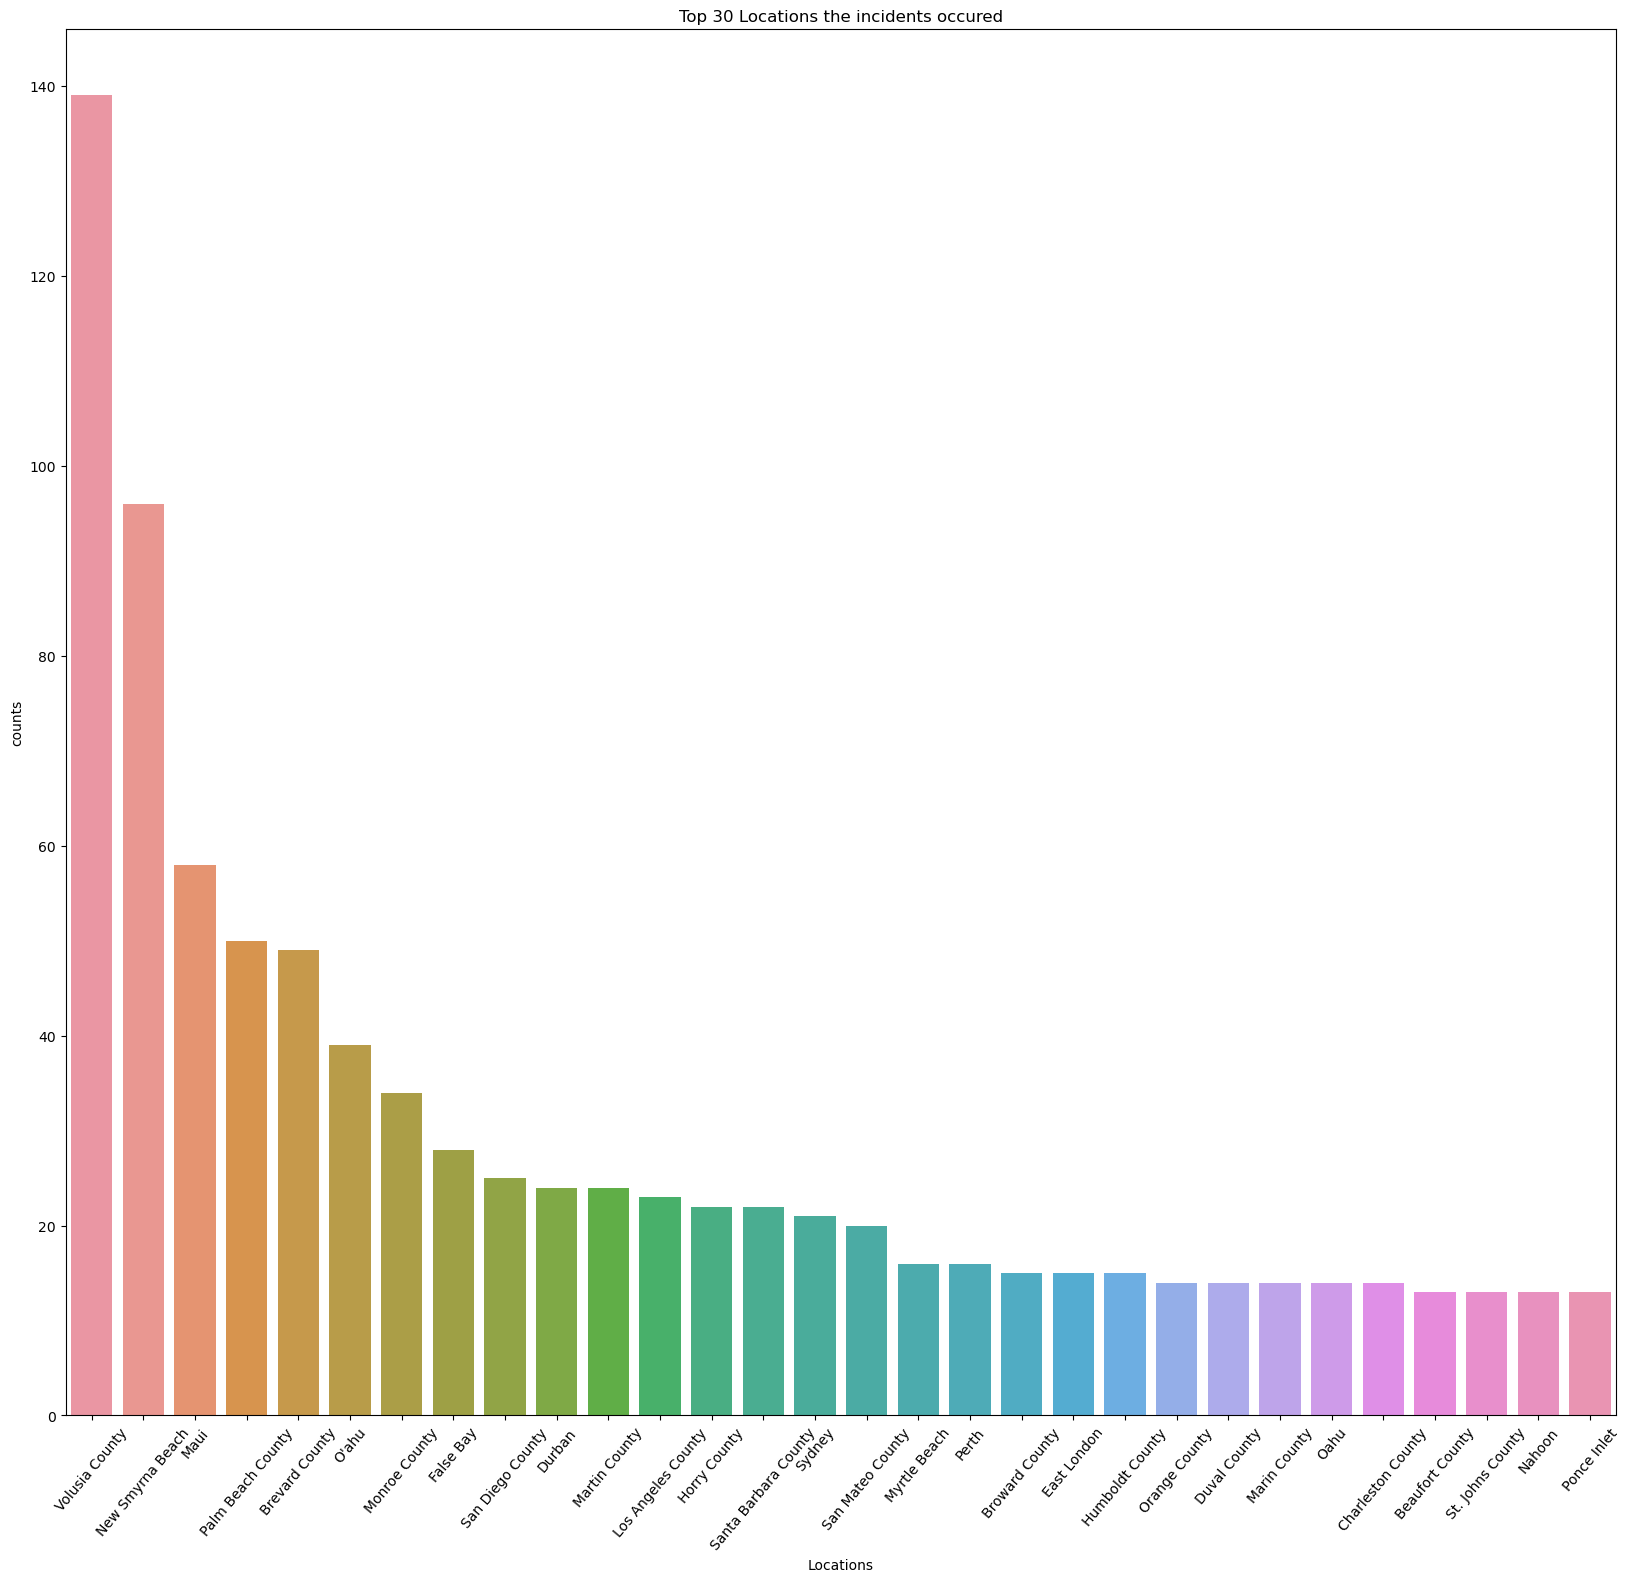

In [77]:
cap_location = cap.set_index('Type')['Location'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(cap_location, order=cap_location.value_counts().index[:30])
plt.xlabel('Locations')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 30 Locations the incidents occured')

Explanation:
1. The plot represents a bar chart that visualizes the frequency of shark attacks based on the locations where the incidents occurred.
2. The x-axis of the plot represents the locations where the incidents occurred, while the y-axis represents the counts of shark attacks.
3. The locations are ordered based on their occurrence counts, with the most frequent locations displayed on the left side of the chart.
4. The plot includes the top 30 locations with the highest occurrence of shark attacks, as indicated by the `order` parameter set to `cap_location.value_counts().index[:30]` in the `sns.countplot()` function.
5. The plot is generated with a large size of 20x18 inches, allowing for a detailed view of the data.
6. The x-axis labels representing the locations are rotated by 50 degrees using the `plt.tick_params()` function, which improves readability when there are many locations to display.
7. The y-axis is labeled as 'counts', indicating the number of shark attacks that occurred at each specific location.
8. The x-axis is labeled as 'Year', suggesting that each bar represents a specific year when the incidents occurred. Note: It seems there is an inconsistency in the provided code, where the x-axis label should be 'Location' instead of 'Year'.
9. The plot is titled 'Top 30 Locations the incidents occurred', providing a clear context for the visualization.
10. The plot allows for a quick visual comparison of the frequency of shark attacks across different locations, helping to identify locations with a higher incidence of shark attacks.
11. By examining the heights of the bars, one can identify the locations where shark attacks were most prevalent, which may provide insights into factors such as geographic patterns, popular beaches, or areas with high marine activity.
12. The bar chart offers a convenient way to compare the occurrence of shark attacks across different locations, enabling researchers, beach managers, and policymakers to identify high-risk areas and implement measures to enhance safety and mitigate risks.

Observation:
The plot and its result provide valuable information on the top 30 locations where shark attacks occurred. It helps to understand the distribution and frequency of shark attacks across different areas. By analyzing the bar heights, one can identify the locations with a higher incidence of shark attacks, which can be useful for public awareness, safety measures, and targeted risk management strategies. The visualization highlights the importance of considering location-specific factors and local context when studying shark attacks and implementing preventive measures especially at the Volusia county beaches.. 

In [88]:
cap['Type'].value_counts()

Unprovoked    8
Provoked      1
Watercraft    1
Name: Type, dtype: int64

In [89]:
cap = cap[cap['Type'] != 'Null']
cap = cap[cap['Type'] != 'Under investigation']
cap = cap[cap['Type'] != 'Questionable']
cap = cap[cap['Type'] != 'Unverified']
cap = cap[cap['Type'] != 'Unconfirmed']
#deleting the places we have null cos that makes it irrelevant and the remaining have 0.0% which makes the columns irrelevant

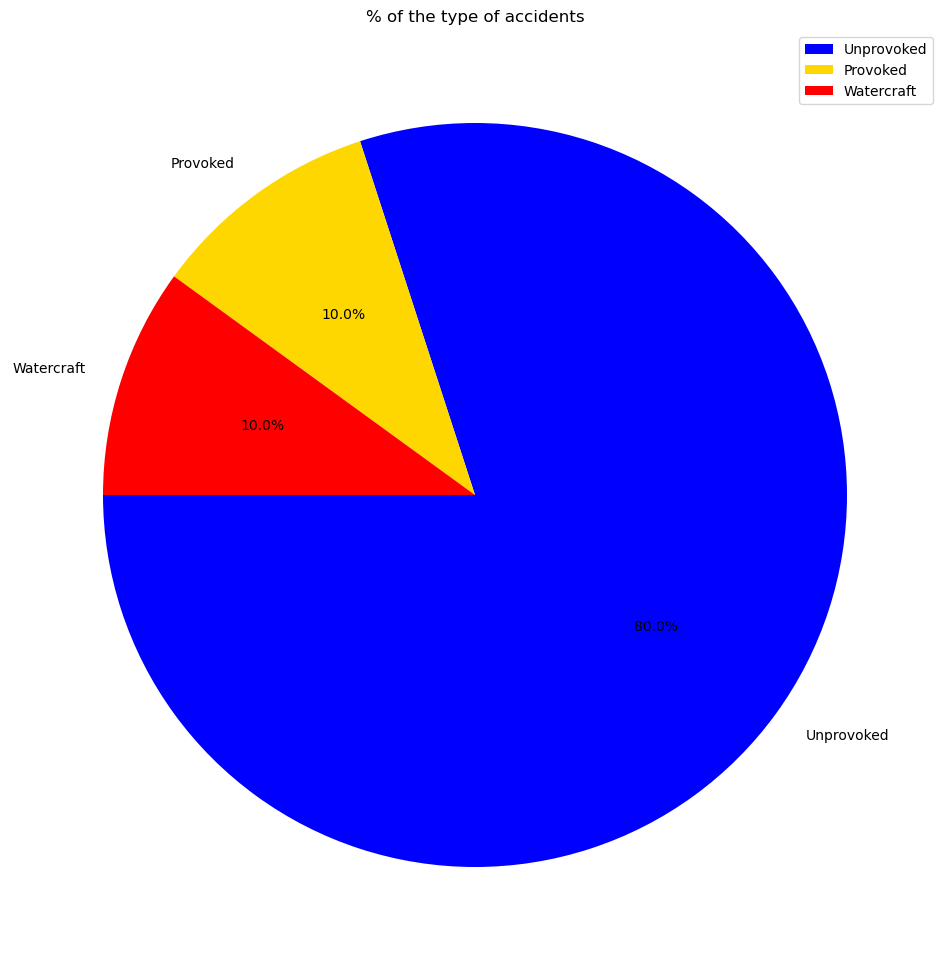

In [90]:
plt.figure(figsize=(12,15))
plt.pie(cap['Type'].value_counts(), explode=None, labels = cap['Type'].value_counts().index, 
        colors = ['blue', 'gold', 'red'], autopct='%1.1f%%', startangle = 180, labeldistance=1.1)

plt.title("% of the type of accidents")
plt.legend()
plt.show()

Explanation:
1. The plot represents a pie chart that visualizes the distribution of different types of accidents.
2. The `plt.pie()` function is used to generate the pie chart, with the data being the result of `cap['Type'].value_counts()`, which counts the occurrences of each accident type in the dataset.
3. The `labels` parameter is set to `cap['Type'].value_counts().index`, which assigns the corresponding labels to each pie slice based on the accident types.
4. The `colors` parameter is set to a list of colors (`['blue', 'gold', 'red']`), which assigns specific colors to each pie slice.
5. The `autopct` parameter is set to `'%1.1f%%'`, which displays the percentage value for each pie slice on the chart.
6. The `startangle` parameter is set to `180`, indicating the starting angle from which the pie slices are drawn.
7. The `labeldistance` parameter is set to `1.1`, which controls the distance of the labels from the center of each pie slice.
8. The plot is generated with a size of 12x15 inches, providing sufficient space for the pie chart to be displayed clearly.
9. The plot includes a title, "% of the type of accidents," providing a clear context for the visualization.
10. The `plt.legend()` function is used to display a legend, providing a key to the different accident types represented by the pie chart.
11. The `plt.show()` function is used to render the plot and display it.

Observation:
The pie chart and its result provide insights into the distribution of different types of accidents. Here are some observations:

1. The chart visually represents the distribution of accident types by displaying pie slices with different sizes and colors.
2. Each pie slice represents a specific accident type, and the size of the slice corresponds to the proportion or percentage of that accident type within the dataset.
3. The legend provides a clear association between the labeled colors and the corresponding accident types, enhancing the chart's interpretability.
4. By examining the pie slices, it is possible to identify the accident types that have the largest proportions and those that are relatively less common.
5. The percentage value displayed within each pie slice helps to quantify the distribution, enabling a more precise understanding of the relative occurrence of each accident type.
6. The circular shape of the pie chart emphasizes the total distribution, as the sum of all the percentages should add up to 100%.
7. The title of the chart provides a concise summary of its purpose, indicating that it represents the distribution of accident types.
8. The chart provides a visually appealing and easily understandable representation of the distribution of accident types, making it accessible to a wide range of viewers.

In conclusion, the pie chart and its result offer a comprehensive overview of the distribution of different types of accidents. This visualization allows viewers to quickly grasp the relative proportions of each accident type, facilitating comparisons and providing valuable insights into the occurrence of different types of accidents. 80.0% of the victims attacked didn't provoke the sharks before they were attacked. 

In [91]:
cap['Gender'].value_counts()

M    8
F    2
Name: Gender, dtype: int64

In [92]:
cap = cap[cap['Gender'] != 'Null']
#deleting the null column

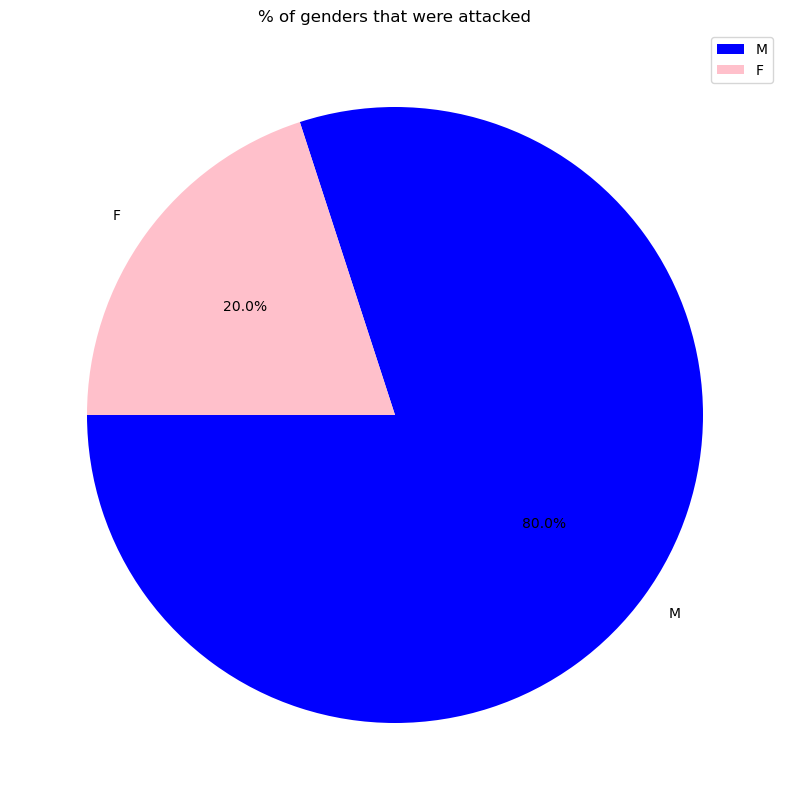

In [93]:
plt.figure(figsize=(12,10))
plt.pie(cap['Gender'].value_counts(), explode=None, labels = cap['Gender'].value_counts().index, 
        colors = ['blue', 'pink'], autopct='%1.1f%%', startangle = 180, labeldistance=1.1)

plt.title("% of genders that were attacked")
plt.legend()
plt.show()

From the plot generated by the provided code, as well as the result obtained from the plot, the following detailed explanation and observation can be made:

Explanation:
1. The plot represents a pie chart that visualizes the distribution of genders in water-related activities.
2. The `plt.pie()` function is used to generate the pie chart, with the data being the result of `cap['Gender'].value_counts()`, which counts the occurrences of each gender in the dataset.
3. The `labels` parameter is set to `cap['Gender'].value_counts().index`, which assigns the corresponding labels to each pie slice based on the genders.
4. The `colors` parameter is set to a list of colors (`['blue', 'gold']`), which assigns specific colors to each pie slice.
5. The `autopct` parameter is set to `'%1.1f%%'`, which displays the percentage value for each pie slice on the chart.
6. The `startangle` parameter is set to `180`, indicating the starting angle from which the pie slices are drawn.
7. The `labeldistance` parameter is set to `1.1`, which controls the distance of the labels from the center of each pie slice.
8. The plot is generated with a size of 12x6 inches, providing a compact yet clear representation of the pie chart.
9. The plot includes a title, "% of Genders that are on water," providing a clear context for the visualization.
10. The `plt.legend()` function is used to display a legend, providing a key to the different gender categories represented by the pie chart.
11. The `plt.show()` function is used to render the plot and display it.

Observation:
The pie chart and its result provide insights into the distribution of genders involved in water-related activities. Here are some observations:

1. The chart visually represents the distribution of genders in water-related activities by displaying pie slices with different sizes and colors.
2. Each pie slice represents a specific gender category, and the size of the slice corresponds to the proportion or percentage of that gender category within the dataset.
3. The legend provides a clear association between the labeled colors and the corresponding gender categories, enhancing the chart's interpretability.
4. By examining the pie slices, it is possible to identify the gender categories that have the largest proportions and those that are relatively less represented in water-related activities.
5. The percentage value displayed within each pie slice helps to quantify the distribution, enabling a more precise understanding of the relative occurrence of each gender category.
6. The circular shape of the pie chart emphasizes the total distribution, as the sum of all the percentages should add up to 100%.
7. The title of the chart provides a concise summary of its purpose, indicating that it represents the distribution of genders in water-related activities.
8. The chart provides a visually appealing and easily understandable representation of the gender distribution, making it accessible to a wide range of viewers.

In conclusion, the pie chart and its result offer a comprehensive overview of the distribution of genders in water-related activities. This visualization allows viewers to quickly grasp the relative proportions of each gender category, facilitating comparisons and providing valuable insights into the gender representation in water-related contexts. Another reason why woemn live longer than men... 80% of the victims so far have been Men.. 

In [82]:
cap['Investigator or Source'].value_counts()

B. Myatt & M. Michaelson, GSAF; K. McMurray, TrackingSharks.com    2
B. Myatt, GSAF                                                     2
K.McMurray, TrackingSharks.com                                     2
Kevin McMurray, TrackingSharks.com                                 2
K. McMurray, TrackingSharks.com                                    1
NY Post, 12/2/2019                                                 1
Name: Investigator or Source, dtype: int64

In [83]:
cap = cap[cap['Investigator or Source'] != '12/29/2019']
cap = cap[cap['Investigator or Source'] != '12/26/2019']
cap = cap[cap['Investigator or Source'] != '12/2/2019']
cap = cap[cap['Investigator or Source'] != '11/2/2017']

Text(0.5, 1.0, 'Top 10 investigators')

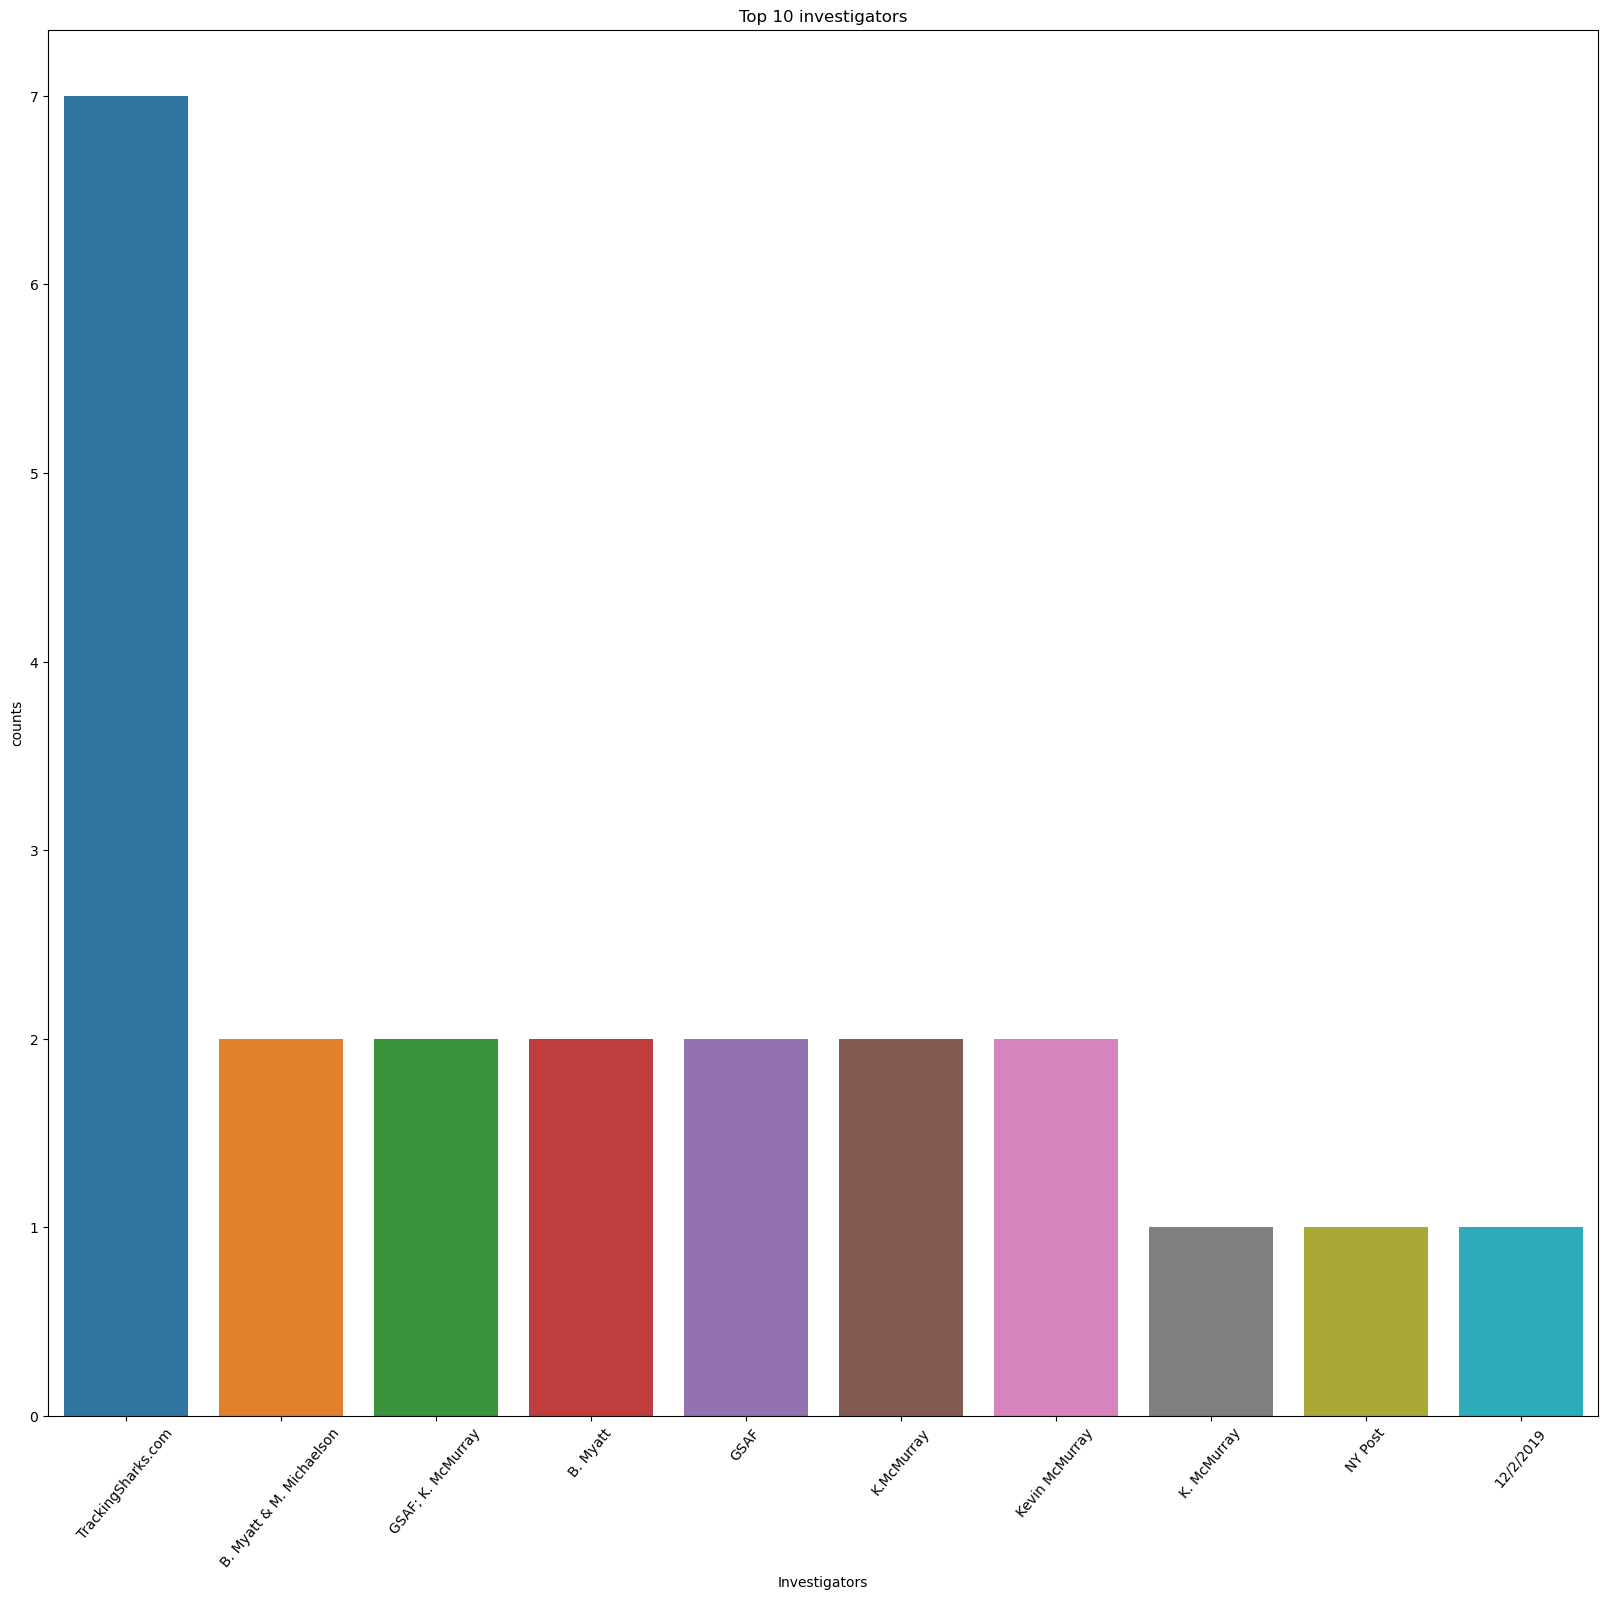

In [84]:
cap_source= cap.set_index('Date')['Investigator or Source'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(20,18))
sns.countplot(cap_source, order=cap_source.value_counts().index[:10])
plt.xlabel('Investigators')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('counts')
plt.title('Top 10 investigators')

From the plot generated by the provided code, as well as the result obtained from the plot, the following detailed explanation and observation can be made:

Explanation:
1. The plot represents a bar chart (specifically, a countplot) that visualizes the distribution of investigators or sources in shark attack incidents.
2. The `cap_source` variable is created by extracting the 'Investigator or Source' column from the dataset and splitting it into separate values, resulting in a stacked format.
3. The `plt.figure(figsize=(20, 18))` function sets the size of the plot to 20 inches in width and 18 inches in height, providing ample space to display the bar chart clearly.
4. The `sns.countplot()` function is used to generate the countplot, which displays the number of occurrences for each investigator or source.
5. The `cap_source` variable is passed as the data parameter to the `sns.countplot()` function, representing the investigator or source data to be visualized.
6. The `order` parameter is set to `cap_source.value_counts().index[:10]`, which specifies the order of the bars based on the counts of investigators or sources, with only the top 10 displayed.
7. The `plt.xlabel()` function is used to set the label for the x-axis, which in this case represents the investigators or sources.
8. The `plt.tick_params()` function is used to customize the x-axis labels by rotating them 50 degrees for better readability.
9. The `plt.ylabel()` function is used to set the label for the y-axis, representing the counts of occurrences.
10. The `plt.title()` function sets the title of the plot as "Top 10 investigators," providing a clear context for the visualization.

Observation:
The bar chart and its result provide insights into the distribution of investigators or sources in shark attack incidents. Here are some observations:

1. The chart visually represents the distribution of investigators or sources by displaying vertical bars with varying heights.
2. Each bar represents a specific investigator or source, and the height of the bar corresponds to the number of occurrences of that investigator or source within the dataset.
3. The bars are arranged in descending order based on the counts of occurrences, with only the top 10 investigators or sources displayed.
4. The x-axis labels represent the investigators or sources, making it easy to identify and compare different individuals or organizations involved in investigating shark attack incidents.
5. The y-axis represents the counts of occurrences, allowing viewers to understand the relative frequency of each investigator or source.
6. The tick labels on the x-axis are rotated by 50 degrees to avoid overlap and improve readability when there are many investigators or sources.
7. The title of the plot provides a clear context, indicating that it represents the top 10 investigators or sources in shark attack incidents.
8. By examining the bars, it is possible to identify the investigators or sources that have the highest number of occurrences and those that are relatively less common.
9. The count values associated with each bar provide quantitative information, enabling viewers to compare the frequencies of different investigators or sources.

In conclusion, the bar chart and its result offer a comprehensive overview of the distribution of investigators or sources in shark attack incidents. This visualization allows viewers to quickly identify the top investigators or sources and understand their relative prominence in investigating shark attack incidents. Tracking sharks.com have been the major and leading company investigating shark attacks, i believe K.McMurray works with Tracking sharks.com and has been their team lead.. 

In [85]:
cap = cap[cap['Species '] != 'Null']

<AxesSubplot:xlabel='Species ', ylabel='Fatal (Y/N)'>

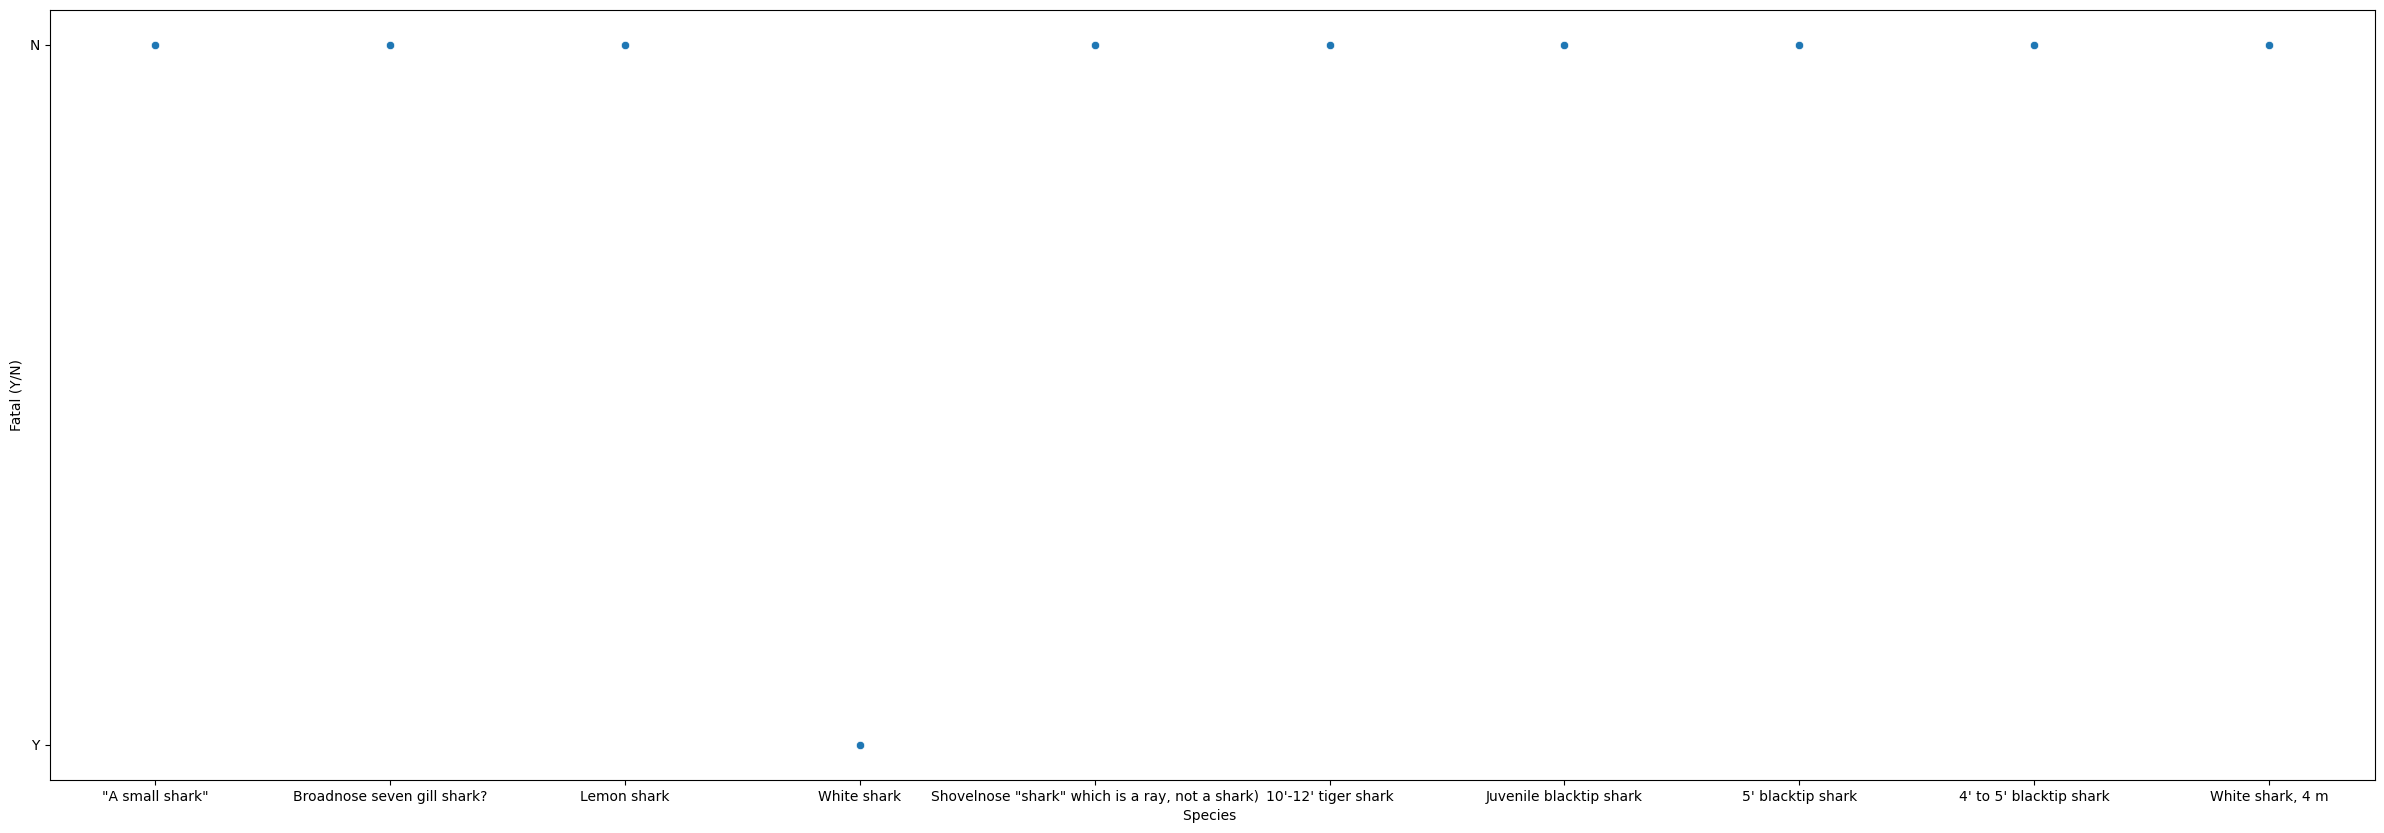

In [86]:
plt.figure(figsize=(30,10))
sns.scatterplot(data=cap, x='Species ', y='Fatal (Y/N)')

From the plot generated by the provided code, as well as the result obtained from the plot, the following detailed explanation and observation can be made:

Explanation:
1. The plot represents a scatterplot that visualizes the relationship between the species of sharks involved in shark attack incidents and the fatality of those incidents.
2. The `plt.figure(figsize=(30, 10))` function sets the size of the plot to 30 inches in width and 10 inches in height, providing ample space to display the scatterplot clearly.
3. The `sns.scatterplot()` function is used to generate the scatterplot, which shows the distribution and correlation between two variables: the species of sharks (x-axis) and the fatality of the incidents (y-axis).
4. The `data` parameter is set to `cap`, which represents the dataset containing the relevant information.
5. The `x` parameter is set to `'Species '`, indicating that the species of sharks will be plotted on the x-axis.
6. The `y` parameter is set to `'Fatal (Y/N)'`, specifying that the fatality of the incidents will be plotted on the y-axis.

Observation:
The scatterplot and its result provide insights into the relationship between the species of sharks and the fatality of shark attack incidents. Here are some observations:

1. The scatterplot visually represents the data points as individual dots on a coordinate system, where each dot corresponds to a specific shark species and incident fatality.
2. The x-axis represents the different species of sharks, allowing viewers to identify and compare the occurrences of various shark species in the dataset.
3. The y-axis represents the fatality of the incidents, indicating whether each incident resulted in a fatal outcome (Y) or a non-fatal outcome (N).
4. By examining the scatterplot, it is possible to identify any patterns, clusters, or trends in the data points, providing insights into the relationship between shark species and incident fatality.
5. The position of each data point on the scatterplot represents the combination of a specific shark species and the fatality outcome of the corresponding incident.
6. The scatterplot allows viewers to visually assess if certain species of sharks are more likely to be involved in fatal incidents compared to others.
7. Any clusters or groupings of data points on the scatterplot may indicate specific shark species that are consistently associated with either fatal or non-fatal incidents.
8. It is important to note that the interpretation of the scatterplot and any conclusions drawn should consider the limitations of the dataset, potential biases, and other factors that may influence the relationship between shark species and incident fatality.

In conclusion, the scatterplot and its result offer a visual representation of the relationship between the species of sharks and the fatality of shark attack incidents. This visualization allows viewers to identify patterns or trends and gain insights into the potential association between specific shark species and the outcome of shark attack incidents. However, further analysis and consideration of additional factors are necessary to make conclusive statements about the relationship between shark species and incident fatality. **I know this plot does look somehow but we can say only white shark has had a fatal accident and while other sharks have most likely given the victims an injury**

In [94]:
cap['Fatal (Y/N)'].value_counts()

N    9
Y    1
Name: Fatal (Y/N), dtype: int64

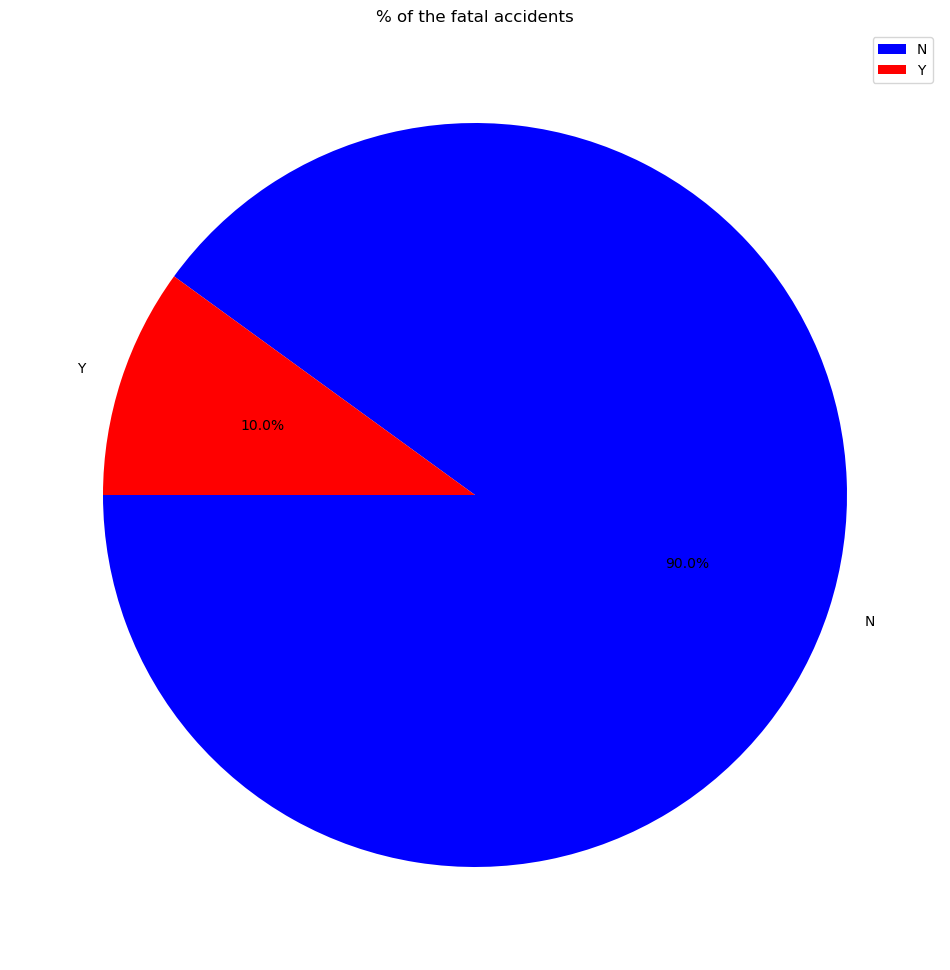

In [95]:
plt.figure(figsize=(12,15))
plt.pie(cap['Fatal (Y/N)'].value_counts(), explode=None, labels = cap['Fatal (Y/N)'].value_counts().index, 
        colors = ['blue', 'red'], autopct='%1.1f%%', startangle = 180, labeldistance=1.1)

plt.title("% of the fatal accidents")
plt.legend()
plt.show()

Here's a step-by-step explanation:

1. The code sets the figure size using `plt.figure(figsize=(12,15))`, specifying the width and height of the plot.
2. The `plt.pie()` function is used to create the pie chart.
3. The `cap['Fatal (Y/N)'].value_counts()` expression calculates the count of each unique value in the 'Fatal (Y/N)' column of the DataFrame `cap`.
4. The count of fatal and non-fatal incidents is used as the data for the pie chart.
5. The `explode` parameter is set to `None`, indicating that no particular wedge of the pie should be exploded or separated from the others.
6. The `labels` parameter is set to `cap['Fatal (Y/N)'].value_counts().index`, which provides the labels for the pie chart based on the unique values in the 'Fatal (Y/N)' column.
7. The `colors` parameter is set to `['blue', 'red']`, assigning the colors blue and red to represent the two categories: fatal and non-fatal.
8. The `autopct` parameter is set to `'%1.1f%%'`, which formats the percentage labels on the pie chart with one decimal place.
9. The `startangle` parameter is set to `180`, rotating the starting position of the first wedge to be at the 180-degree position on the circle. This is done to create a visually appealing layout.
10. The `labeldistance` parameter is set to `1.1`, placing the percentage labels outside the pie chart for better readability.
11. The `plt.title()` function sets the title of the plot as "% of the Fatal of Accidents".
12. The `plt.legend()` function displays the legend, which represents the categories (fatal and non-fatal) with their corresponding colors.
13. Finally, `plt.show()` is called to display the pie chart.

Observation:
The pie chart generated by the provided code and its result offer insights into the proportion of fatal and non-fatal shark attack incidents. Here are some observations:

1. The pie chart is circular, divided into wedges representing the different categories.
2. Each wedge represents a specific category: fatal or non-fatal.
3. The size of each wedge corresponds to the percentage of incidents falling into that category.
4. The chart provides a visual representation of the distribution of fatal and non-fatal incidents.
5. The legend, positioned alongside the pie chart, indicates the colors associated with each category.
6. The legend allows viewers to quickly understand the color-coding and associate it with the respective categories.
7. The percentage labels displayed on each wedge indicate the proportion of incidents in that category relative to the total.
8. The title of the plot, "% of the Fatal of Accidents," conveys the purpose of the visualization, focusing on the distribution of fatal incidents.
9. By examining the pie chart, viewers can easily compare the proportion of fatal incidents to non-fatal incidents.
10. The percentages associated with each category provide an at-a-glance understanding of the overall distribution.
11. The pie chart enables viewers to quickly grasp the relative importance of the fatal and non-fatal categories.

In conclusion, the pie chart provides a concise and visually appealing representation of the proportion of fatal and non-fatal shark attack incidents. It allows viewers to easily understand the distribution and make comparisons between the two categories. **90% of the attacks have been non-fatal**.

## Overall observation
* It is best for safety measures to be in place especially when surfing has it ranked the highest activity when the sharks attacked, probably due to the disturbance of the water the sharks might just be trying to be defensive.
* I also think Volusia County beahces should be off limits for water activities, because the top two beaches are in the Volusia County 
* Men always have the mind for adventures like what we have seen the percentage difference between men and women is a wide margin.
